# **Introduction**
As a passionate football player and a fan of women's football, I decided to focus on analyzing the 2019 FIFA Women's World Cup, particularly the final between the United States and the Netherlands. The United States national team, led by my favorite player, Alex Morgan, has always been a source of inspiration for me, and this tournament marked a historic moment in the sport. By examining this final match, I aim to explore the performance of both teams and assess their strategies throughout the game.





# Initialization, choice of the competition and the match

In this analysis, I used the StatsBomb API as my primary data source, gathering match statistics that allowed me to dive deep into the details of the game. The goal is to provide a better understanding of the teams' performances, from shot locations to team strategies, beyond the final score.
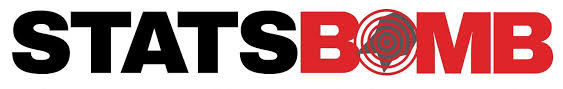

In [ ]:
!pip install matplotlib-venn
!pip install statsbombpy
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.3 MB/s eta 0:00:00


To analyze and visualize match data from the FIFA Women's World Cup 2019, I utilized powerful Python packages like mplsoccernumpy,pandas, mplsoccer and seaborn. These tools allow us to create detailed football visualizations such as pass networks on a pitch, heatmaps for player activity, and expected goals (xG) maps.




Importing required libraries for data manipulation, analysis, and visualization:

In [ ]:
import matplotlib.pyplot as plt
from statsbombpy import sb
import numpy as np
import pandas as pd
from mplsoccer.pitch import Pitch
import seaborn as sns

Fetching the list of available competitions using StatsBomb API
This provides an overview of the datasets accessible for analysis, including tournaments like the FIFA Women's World Cup

In [ ]:
sb.competitions()

competition_id  season_id   country_name        competition_name  \
0                9        281        Germany           1. Bundesliga   
1                9         27        Germany           1. Bundesliga   
2             1267        107         Africa  African Cup of Nations   
3               16          4         Europe        Champions League   
4               16          1         Europe        Champions League   
..             ...        ...            ...                     ...   
69              55         43         Europe               UEFA Euro   
70              35         75         Europe      UEFA Europa League   
71              53        106         Europe       UEFA Women's Euro   
72              72        107  International       Women's World Cup   
73              72         30  International       Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      False   
1                male              False                      False   
2                male              False                       True   
3                male              False                      False   
4                male              False                      False   
..                ...                ...                        ...   
69               male              False                       True   
70               male              False                      False   
71             female              False                       True   
72             female              False                       True   
73             female              False                       True   

   season_name               match_updated           match_updated_360  \
0    2023/2024  2024-07-15T14:15:54.671676  2024-07-15T14:17:00.877356   
1    2015/2016  2024-05-19T11:11:14.192381                        None   
2         2023  2024-06-13T07:51:02.452825                        None   
3    2018/2019  2024-06-12T07:44:38.559714     2021-06-13T16:17:31.694   
4    2017/2018  2024-02-13T02:35:28.134882     2021-06-13T16:17:31.694   
..         ...                         ...                         ...   
69        2020  2024-04-16T12:44:40.558402  2024-04-16T12:47:18.505110   
70   1988/1989  2024-02-12T14:45:05.702250     2021-06-13T16:17:31.694   
71        2022  2024-02-13T13:27:17.178263  2024-02-13T13:30:52.820588   
72        2023  2024-07-14T16:59:48.469596  2024-07-14T17:01:38.887279   
73        2019  2024-02-13T09:41:26.379767     2021-06-13T16:17:31.694   

           match_available_360             match_available  
0   2024-07-15T14:17:00.877356  2024-07-15T14:15:54.671676  
1                         None  2024-05-19T11:11:14.192381  
2                         None  2024-06-13T07:51:02.452825  
3                         None  2024-06-12T07:44:38.559714  
4                         None  2024-02-13T02:35:28.134882  
..                         ...                         ...  
69  2024-04-16T12:47:18.505110  2024-04-16T12:44:40.558402  
70                        None  2024-02-12T14:45:05.702250  
71  2024-02-13T13:30:52.820588  2024-02-13T13:27:17.178263  
72  2024-07-14T17:01:38.887279  2024-07-14T16:59:48.469596  
73                        None  2024-02-13T09:41:26.379767  

[74 rows x 12 columns]

#Fetching match data using StatsBomb API for the FIFA Women's World Cup 2019
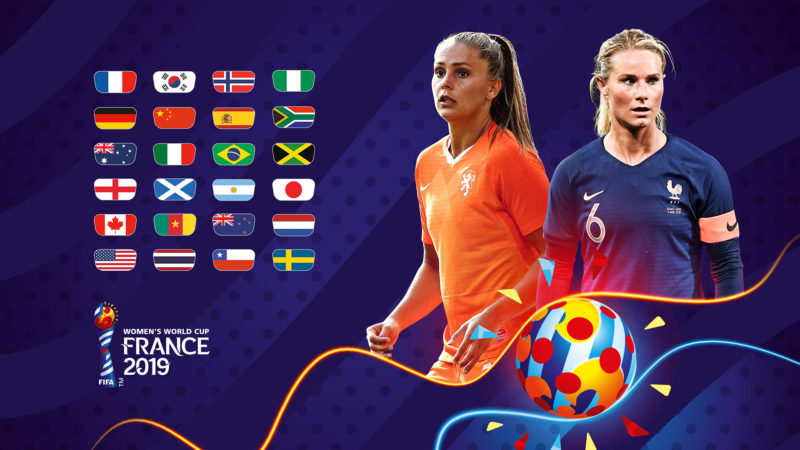



In [ ]:
matches = sb.matches(competition_id=72, season_id=30)
matches.head()

match_id  match_date      kick_off                        competition  \
0     22949  2019-06-12  18:00:00.000  International - Women's World Cup   
1     22943  2019-06-11  21:00:00.000  International - Women's World Cup   
2     22944  2019-06-11  18:00:00.000  International - Women's World Cup   
3     22961  2019-06-14  15:00:00.000  International - Women's World Cup   
4     22964  2019-06-15  15:00:00.000  International - Women's World Cup   

  season              home_team         away_team  home_score  away_score  \
0   2019        Germany Women's     Spain Women's           1           0   
1   2019  United States Women's  Thailand Women's          13           0   
2   2019          Chile Women's    Sweden Women's           0           2   
3   2019          Japan Women's  Scotland Women's           2           1   
4   2019    Netherlands Women's  Cameroon Women's           3           1   

  match_status  ...         last_updated_360 match_week competition_stage  \
0    available  ...  2021-06-13T16:17:31.694          2    Regular Season   
1    available  ...  2021-06-13T16:17:31.694          1    Regular Season   
2    available  ...  2021-06-13T16:17:31.694          1    Regular Season   
3    available  ...  2021-06-13T16:17:31.694          2    Regular Season   
4    available  ...  2021-06-13T16:17:31.694          2    Regular Season   

                     stadium                referee  \
0           Stade du Hainaut        Kateryna Monzul   
1  Stade Auguste-Delaune II                     NaN   
2               Roazhon Park  Lucila Venegas Montes   
3               Roazhon Park                    NaN   
4           Stade du Hainaut                    NaN   

                     home_managers            away_managers data_version  \
0         Martina Voss-Tecklenburg              Jorge Vilda        1.1.0   
1                    Jillian Ellis  Nuengrutai Srathongvian        1.1.0   
2  José Antonio Letelier Henríquez        Peter Gerhardsson        1.1.0   
3          Asako Takemoto Takakura  Michelle "Shelley" Kerr        1.1.0   
4         Sarina Glotzbach-Wiegman            Alain Djeumfa        1.1.0   

  shot_fidelity_version xy_fidelity_version  
0                     2                   2  
1                     2                   2  
2                     2                   2  
3                     2                   2  
4                     2                   2  

[5 rows x 22 columns]

In [ ]:
matches.columns

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   match_id               52 non-null     int64 
 1   match_date             52 non-null     object
 2   kick_off               52 non-null     object
 3   competition            52 non-null     object
 4   season                 52 non-null     object
 5   home_team              52 non-null     object
 6   away_team              52 non-null     object
 7   home_score             52 non-null     int64 
 8   away_score             52 non-null     int64 
 9   match_status           52 non-null     object
 10  match_status_360       52 non-null     object
 11  last_updated           52 non-null     object
 12  last_updated_360       52 non-null     object
 13  match_week             52 non-null     int64 
 14  competition_stage      52 non-null     object
 15  stadium                52

Displaying the results of all matches played in the selected international competition:**Women's World Cup** ,  the season of : **2019** .This step allows us to view the match outcomes within the competition.

In [ ]:
def matches_results(matches):
    for index, match in matches.iterrows():
        home_team_name = match['home_team']
        away_team_name = match['away_team']
        home_score = match['home_score']
        away_score = match['away_score']
        describe_text = f"The match between {home_team_name} and {away_team_name}"
        result_text = f" finished {home_score} : {away_score}"
        print(describe_text + result_text)

In [ ]:
matches_results(matches)

The match between Germany Women's and Spain Women's finished 1 : 0
The match between United States Women's and Thailand Women's finished 13 : 0
The match between Chile Women's and Sweden Women's finished 0 : 2
The match between Japan Women's and Scotland Women's finished 2 : 1
The match between Netherlands Women's and Cameroon Women's finished 3 : 1
The match between Norway Women's and Australia Women's finished 1 : 1
The match between Australia Women's and Italy Women's finished 1 : 2
The match between Jamaica Women's and Italy Women's finished 0 : 5
The match between Jamaica Women's and Australia Women's finished 1 : 4
The match between Argentina Women's and Japan Women's finished 0 : 0
The match between Nigeria Women's and Korea Republic Women's finished 2 : 0
The match between South Africa Women's and China PR Women's finished 0 : 1
The match between Canada Women's and New Zealand Women's finished 2 : 0
The match between Netherlands Women's and Canada Women's finished 2 : 1
The mat

In [ ]:
matches.home_team.unique()

array(["Germany Women's", "United States Women's", "Chile Women's",
       "Japan Women's", "Netherlands Women's", "Norway Women's",
       "Australia Women's", "Jamaica Women's", "Argentina Women's",
       "Nigeria Women's", "South Africa Women's", "Canada Women's",
       "Sweden Women's", "Cameroon Women's", "England Women's",
       "France Women's", "Korea Republic Women's", "China PR Women's",
       "Italy Women's", "Spain Women's", "Brazil Women's",
       "New Zealand Women's", "Scotland Women's", "Thailand Women's"],
      dtype=object)

In [ ]:
def id_of_match(matches, home_team_required, away_team_required):
    match_id_required = None

    for index, match in matches.iterrows():
        home_team_name = match['home_team']
        away_team_name = match['away_team']
        if (home_team_name == home_team_required) and (away_team_name == away_team_required):
            match_id_required = match['match_id']
            break

    theMatch = (matches['home_team'] == home_team_required) & (matches['away_team'] == away_team_required)

    if match_id_required:
        return print(home_team_required + ' vs ' + away_team_required + ' has id: ' + str(matches[theMatch]['match_id'].values[0]))
    else:
        print(home_team_required + ' vs ' + away_team_required + ' was not found or has not been played.')
        return None


In [ ]:
home_team_required ="England Women's"
away_team_required ="Sweden Women's"
id_of_match(matches, home_team_required, away_team_required)

England Women's vs Sweden Women's has id: 69301


Displayed all the rows where either the home or away team is "United States Women's":

In [ ]:
matches[(matches['home_team'] == "United States Women's") | (matches['away_team'] == "United States Women's")]

match_id  match_date      kick_off                        competition  \
1      22943  2019-06-11  21:00:00.000  International - Women's World Cup   
14     68345  2019-06-20  21:00:00.000  International - Women's World Cup   
25     22974  2019-06-16  18:00:00.000  International - Women's World Cup   
27     69321  2019-07-07  17:00:00.000  International - Women's World Cup   
35     69202  2019-06-28  21:00:00.000  International - Women's World Cup   
48     69258  2019-07-02  21:00:00.000  International - Women's World Cup   
51     69161  2019-06-24  18:00:00.000  International - Women's World Cup   

   season              home_team              away_team  home_score  \
1    2019  United States Women's       Thailand Women's          13   
14   2019         Sweden Women's  United States Women's           0   
25   2019  United States Women's          Chile Women's           3   
27   2019  United States Women's    Netherlands Women's           2   
35   2019         France Women's  United States Women's           1   
48   2019        England Women's  United States Women's           1   
51   2019          Spain Women's  United States Women's           1   

    away_score match_status  ...         last_updated_360 match_week  \
1            0    available  ...  2021-06-13T16:17:31.694          1   
14           2    available  ...  2021-06-13T16:17:31.694          3   
25           0    available  ...  2021-06-13T16:17:31.694          2   
27           0    available  ...  2021-06-13T16:17:31.694          7   
35           2    available  ...  2021-06-13T16:17:31.694          5   
48           2    available  ...  2021-06-13T16:17:31.694          6   
51           2    available  ...  2021-06-13T16:17:31.694          4   

   competition_stage                    stadium                 referee  \
1     Regular Season  Stade Auguste-Delaune II                      NaN   
14    Regular Season               Stade Océane  Anastasia Pustovoytova   
25    Regular Season          Parc des Princes             Riem Hussein   
27             Final           Groupama Stadium      Stéphanie Frappart   
35    Regular Season          Parc des Princes          Kateryna Monzul   
48       Semi-finals           Groupama Stadium                     NaN   
51       Round of 16  Stade Auguste-Delaune II          Katalin Kulcsar   

               home_managers                    away_managers data_version  \
1              Jillian Ellis          Nuengrutai Srathongvian        1.1.0   
14         Peter Gerhardsson                    Jillian Ellis        1.1.0   
25             Jillian Ellis  José Antonio Letelier Henríquez        1.1.0   
27             Jillian Ellis         Sarina Glotzbach-Wiegman        1.1.0   
35  Corinne Catherine Diacre                    Jillian Ellis        1.1.0   
48              Phil Neville                    Jillian Ellis        1.1.0   
51               Jorge Vilda                    Jillian Ellis        1.1.0   

   shot_fidelity_version xy_fidelity_version  
1                      2                   2  
14                     2                   2  
25                     2                   2  
27                     2                   2  
35                     2                   2  
48                     2                   2  
51                     2                   2  

[7 rows x 22 columns]

#**Dataframe Creation for Data Aggregation:**
Creating DataFrames to aggregate and organize the key data points, such as total goals scored by each team.
This step helps in structuring the data for further analysis and visualization, enabling better insights into team performance across the competition.

In [ ]:
def create_match_results_dataframe(matches):
    results_data = []
    for index, row in matches.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']
        home_score = row['home_score']
        away_score = row['away_score']

        match_result = {}
        match_result['home_team'] = home_team
        match_result['away_team'] = away_team

        if home_score > away_score:
            match_result['home_team_result'] = 'Win'
            match_result['away_team_result'] = 'Loss'
        elif home_score < away_score:
            match_result['home_team_result'] = 'Loss'
            match_result['away_team_result'] = 'Win'
        else:
            match_result['home_team_result'] = 'Draw'
            match_result['away_team_result'] = 'Draw'

        results_data.append(match_result)

    return pd.DataFrame(results_data)




created a dataframe of all the **matche's results** that have been played during the competition:

In [ ]:
match_results_df = create_match_results_dataframe(matches)
match_results_df

home_team               away_team home_team_result  \
0          Germany Women's           Spain Women's              Win   
1    United States Women's        Thailand Women's              Win   
2            Chile Women's          Sweden Women's             Loss   
3            Japan Women's        Scotland Women's              Win   
4      Netherlands Women's        Cameroon Women's              Win   
5           Norway Women's       Australia Women's             Draw   
6        Australia Women's           Italy Women's             Loss   
7          Jamaica Women's           Italy Women's             Loss   
8          Jamaica Women's       Australia Women's             Loss   
9        Argentina Women's           Japan Women's             Draw   
10         Nigeria Women's  Korea Republic Women's              Win   
11    South Africa Women's        China PR Women's             Loss   
12          Canada Women's     New Zealand Women's              Win   
13     Netherlands Women's          Canada Women's              Win   
14          Sweden Women's   United States Women's             Loss   
15          Sweden Women's          Canada Women's              Win   
16        Cameroon Women's     New Zealand Women's              Win   
17         Germany Women's         Nigeria Women's              Win   
18         England Women's          Sweden Women's             Loss   
19          France Women's          Brazil Women's              Win   
20         Germany Women's          Sweden Women's             Loss   
21         England Women's        Scotland Women's              Win   
22          Sweden Women's        Thailand Women's              Win   
23           Japan Women's         England Women's             Loss   
24  Korea Republic Women's          Norway Women's             Loss   
25   United States Women's           Chile Women's              Win   
26          Norway Women's         Nigeria Women's              Win   
27   United States Women's     Netherlands Women's              Win   
28        China PR Women's           Spain Women's             Draw   
29           Italy Women's          Brazil Women's             Loss   
30          France Women's  Korea Republic Women's              Win   
31         Germany Women's        China PR Women's              Win   
32           Spain Women's    South Africa Women's              Win   
33          Brazil Women's         Jamaica Women's              Win   
34          Canada Women's        Cameroon Women's              Win   
35          France Women's   United States Women's             Loss   
36     New Zealand Women's     Netherlands Women's             Loss   
37          France Women's          Norway Women's              Win   
38       Australia Women's          Brazil Women's              Win   
39         England Women's       Argentina Women's              Win   
40         Nigeria Women's          France Women's             Loss   
41    South Africa Women's         Germany Women's             Loss   
42        Scotland Women's       Argentina Women's             Draw   
43        Thailand Women's           Chile Women's             Loss   
44         England Women's        Cameroon Women's              Win   
45           Italy Women's        China PR Women's              Win   
46     Netherlands Women's           Japan Women's              Win   
47          Norway Women's         England Women's             Loss   
48         England Women's   United States Women's             Loss   
49     Netherlands Women's          Sweden Women's              Win   
50           Italy Women's     Netherlands Women's             Loss   
51           Spain Women's   United States Women's             Loss   

   away_team_result  
0              Loss  
1              Loss  
2               Win  
3              Loss  
4              Loss  
5              Draw  
6               Win  
7               Win  
8               Win  
9              Draw  
10         

In [ ]:
def calculate_team_record(matches):

    team_records = {}
    for index, row in matches.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']
        home_score = row['home_score']
        away_score = row['away_score']

        # Initialize team records if they don't exist
        if home_team not in team_records:
            team_records[home_team] = {'wins': 0, 'losses': 0, 'draws': 0}
        if away_team not in team_records:
            team_records[away_team] = {'wins': 0, 'losses': 0, 'draws': 0}

        # Update team records based on match result
        if home_score > away_score:
            team_records[home_team]['wins'] += 1
            team_records[away_team]['losses'] += 1
        elif home_score < away_score:
            team_records[home_team]['losses'] += 1
            team_records[away_team]['wins'] += 1
        else:
            team_records[home_team]['draws'] += 1
            team_records[away_team]['draws'] += 1

    # Convert to DataFrame
    team_records_df = pd.DataFrame.from_dict(team_records, orient='index')
    team_records_df.index.name = "Team"

    return team_records_df


created a dataframe for the number of **wins** , **losses** and **draws** for each team in the competition:

In [ ]:
team_record_df = calculate_team_record(matches)
team_record_df

wins  losses  draws
Team                                       
Germany Women's            4       1      0
Spain Women's              1       2      1
United States Women's      7       0      0
Thailand Women's           0       3      0
Chile Women's              1       2      0
Sweden Women's             5       2      0
Japan Women's              1       2      1
Scotland Women's           0       2      1
Netherlands Women's        6       1      0
Cameroon Women's           1       3      0
Norway Women's             2       2      1
Australia Women's          2       1      1
Italy Women's              3       2      0
Jamaica Women's            0       3      0
Argentina Women's          0       1      2
Nigeria Women's            1       3      0
Korea Republic Women's     0       3      0
South Africa Women's       0       3      0
China PR Women's           1       2      1
Canada Women's             2       2      0
New Zealand Women's        0       3      0
England Women's            5       2      0
France Women's             4       1      0
Brazil Women's             2       2      0

#**Tournament teams and matches analysis and visualizations**

**Barplot** for visualizing each **team records (wins,losses,draws)** during the competition :

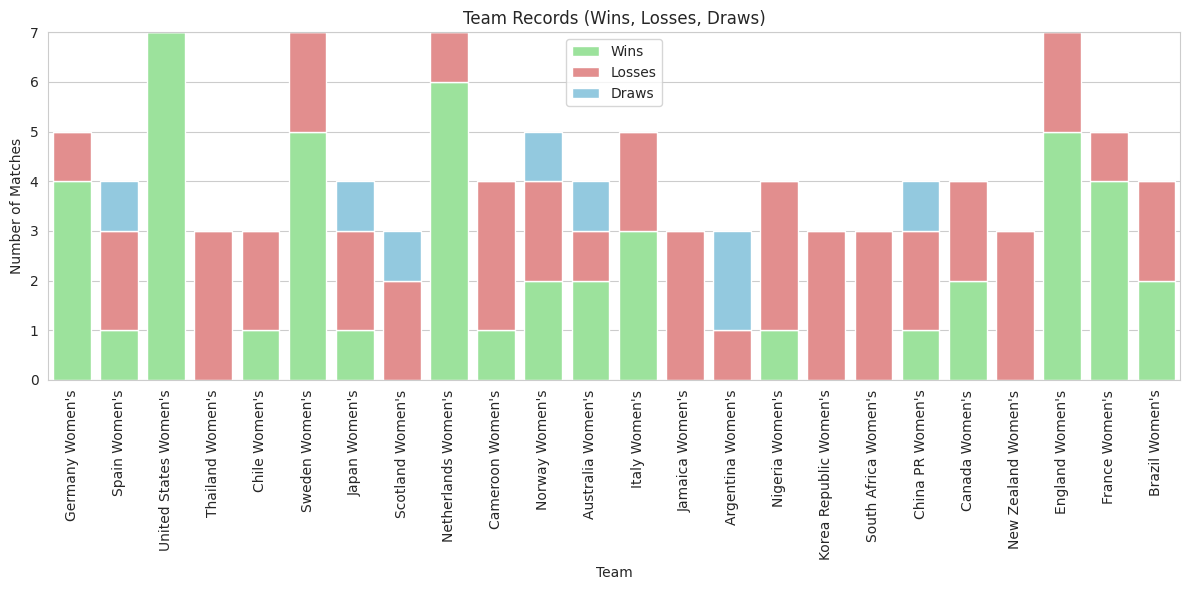

In [ ]:
plt.figure(figsize=(12, 6))

# Use seaborn to create a stacked bar plot
sns.set_style("whitegrid")

# Create stacked bar plot with custom colors
sns.barplot(x=team_record_df.index, y=team_record_df['wins'], color="lightgreen", label="Wins")
sns.barplot(x=team_record_df.index, y=team_record_df['losses'], color="lightcoral", bottom=team_record_df['wins'], label="Losses")
sns.barplot(x=team_record_df.index, y=team_record_df['draws'], color="skyblue", bottom=team_record_df['wins'] + team_record_df['losses'], label="Draws")


plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.title('Team Records (Wins, Losses, Draws)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

**Pieplot** for visualizing the team results **percentage** during the competition:




In [ ]:
team_name = "Germany Women's"

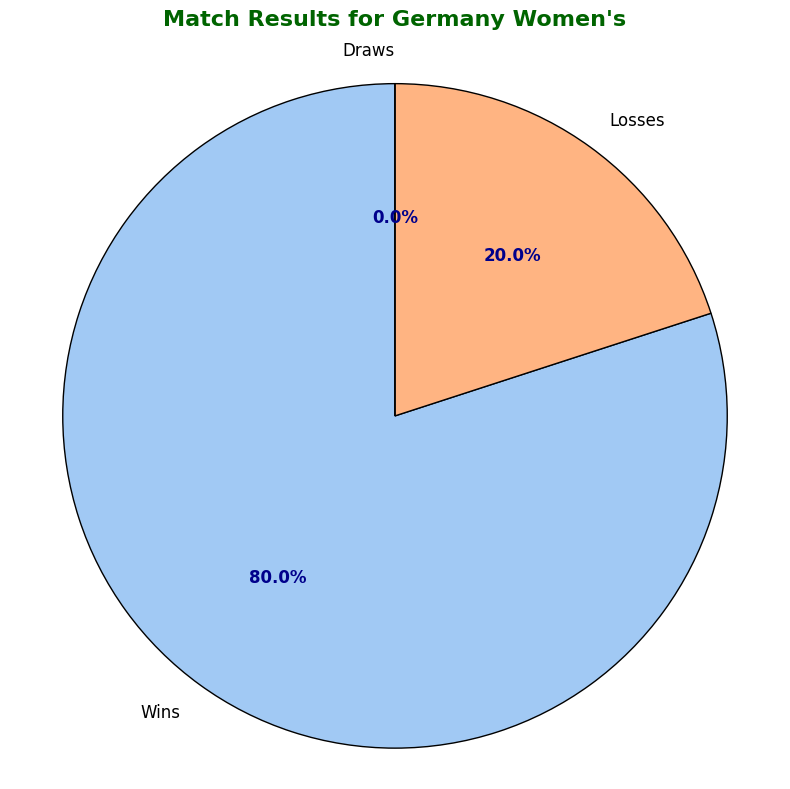

In [ ]:
if team_name in team_record_df.index:
    team_data = team_record_df.loc[team_name]
    labels = ['Wins', 'Losses', 'Draws']
    sizes = [team_data['wins'], team_data['losses'], team_data['draws']]
    colors = sns.color_palette("pastel", n_colors=3)

    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 12, 'color': 'black'},
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}
    )
    plt.setp(autotexts, size=12, weight="bold", color="darkblue")
    plt.title(f"Match Results for {team_name}", fontsize=16, fontweight='bold', color="darkgreen", pad=20)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    print(f"Team '{team_name}' not found in the data.")


**Heatmap** for visualizing the distribution of **matche scores**:

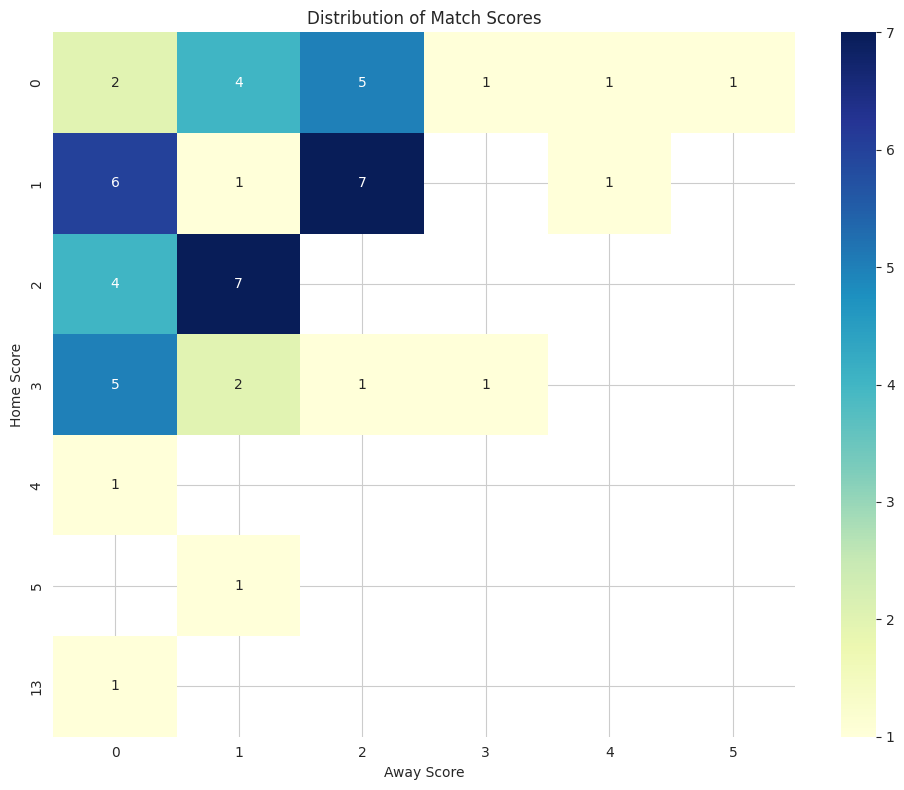

In [ ]:
score_counts = matches.groupby(['home_score', 'away_score']).size().reset_index(name='count')
score_matrix = score_counts.pivot(index='home_score', columns='away_score', values='count')

plt.figure(figsize=(10, 8))
sns.heatmap(score_matrix, annot=True, cmap="YlGnBu")
plt.xlabel("Away Score")
plt.ylabel("Home Score")
plt.title("Distribution of Match Scores")
plt.tight_layout()
plt.show()

Creating a DataFrame to track the **total goals** scored by each team throughout the competition.This DataFrame aggregates the goal counts per team, allowing us to analyze team performance and goal-scoring trends during the tournament.

In [ ]:
gaol_permatch= pd.DataFrame({
    'team': matches['home_team'].tolist() + matches['away_team'].tolist(),
    'total_goals': matches['home_score'].tolist() + matches['away_score'].tolist(),
    'match_index': list(range(len(matches))) * 2  # Duplicate for home and away
})
gaol_permatch['total_goals'] = gaol_permatch.groupby('match_index')['total_goals'].transform('sum')
gaol_permatch

team  total_goals  match_index
0          Germany Women's            1            0
1    United States Women's           13            1
2            Chile Women's            2            2
3            Japan Women's            3            3
4      Netherlands Women's            4            4
..                     ...          ...          ...
99         England Women's            3           47
100  United States Women's            3           48
101         Sweden Women's            1           49
102    Netherlands Women's            2           50
103  United States Women's            3           51

[104 rows x 3 columns]

In [ ]:
team_goals =gaol_permatch.groupby('team')['total_goals'].sum().reset_index()
team_goals.sort_values(by='total_goals', ascending=False, inplace=True)
team_goals

team  total_goals
23   United States Women's           29
22        Thailand Women's           21
7          England Women's           18
21          Sweden Women's           18
14     Netherlands Women's           16
1        Australia Women's           15
8           France Women's           14
17          Norway Women's           14
10           Italy Women's           13
11         Jamaica Women's           13
18        Scotland Women's           12
2           Brazil Women's           12
9          Germany Women's           12
3         Cameroon Women's           11
13  Korea Republic Women's            9
19    South Africa Women's            9
16         Nigeria Women's            9
20           Spain Women's            8
12           Japan Women's            8
5            Chile Women's            7
4           Canada Women's            7
0        Argentina Women's            7
15     New Zealand Women's            6
6         China PR Women's            4

**Barplot** for visualizing **total goals** scored by each team during the tournament:

<ipython-input-23-72f7d9bc8fd9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


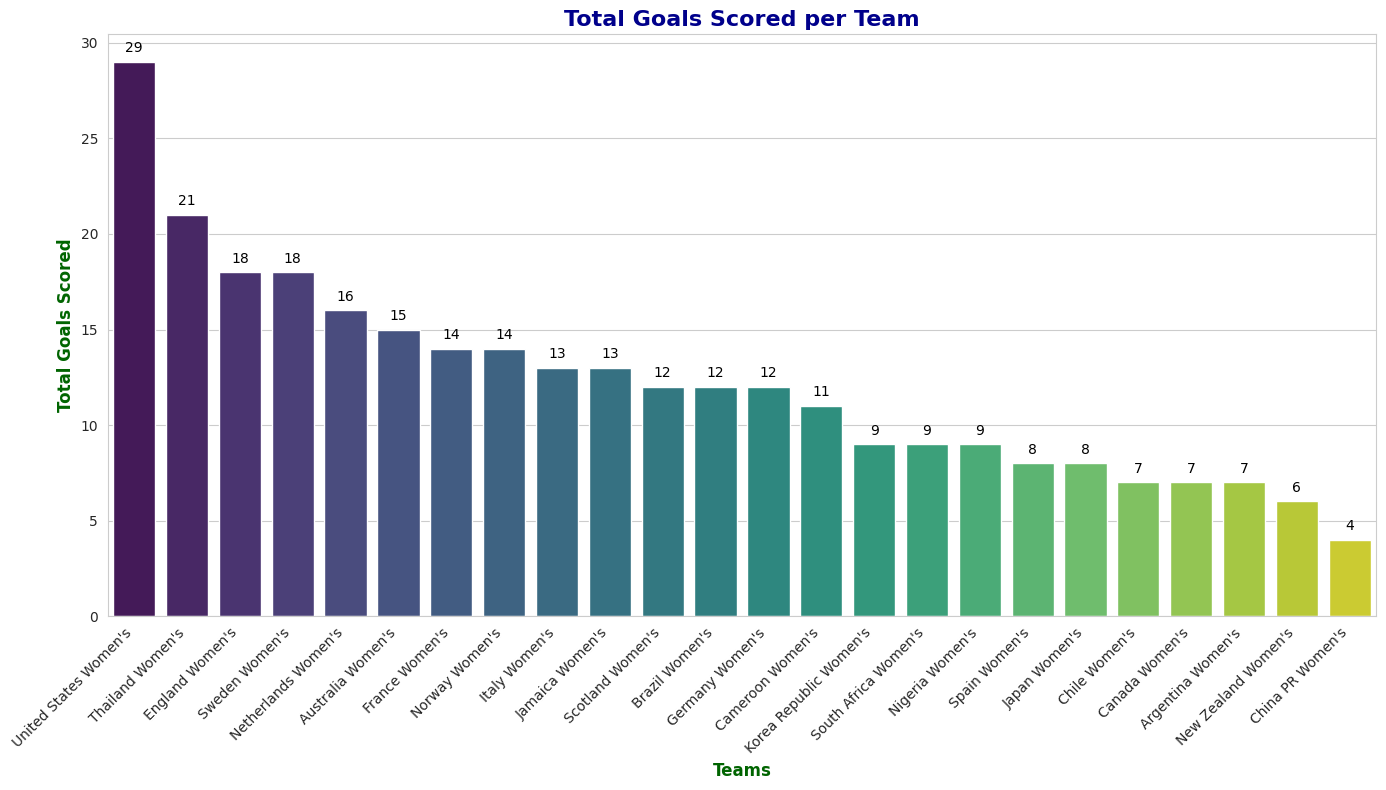

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=team_goals,
    x='team',
    y='total_goals',
    palette="viridis"
)

# Add titles and labels
plt.title("Total Goals Scored per Team", fontsize=16, fontweight='bold', color="darkblue")
plt.xlabel("Teams", fontsize=12, fontweight='bold', color="darkgreen")
plt.ylabel("Total Goals Scored", fontsize=12, fontweight='bold', color="darkgreen")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)

# Annotate bars with values
for i, value in enumerate(team_goals['total_goals']):
    plt.text(i, value + 0.5, f"{value:.0f}", ha='center', fontsize=10, color="black")

plt.tight_layout()
plt.show()

**Lineplot** for visualizing the distribution of the **number of matches** over time :  

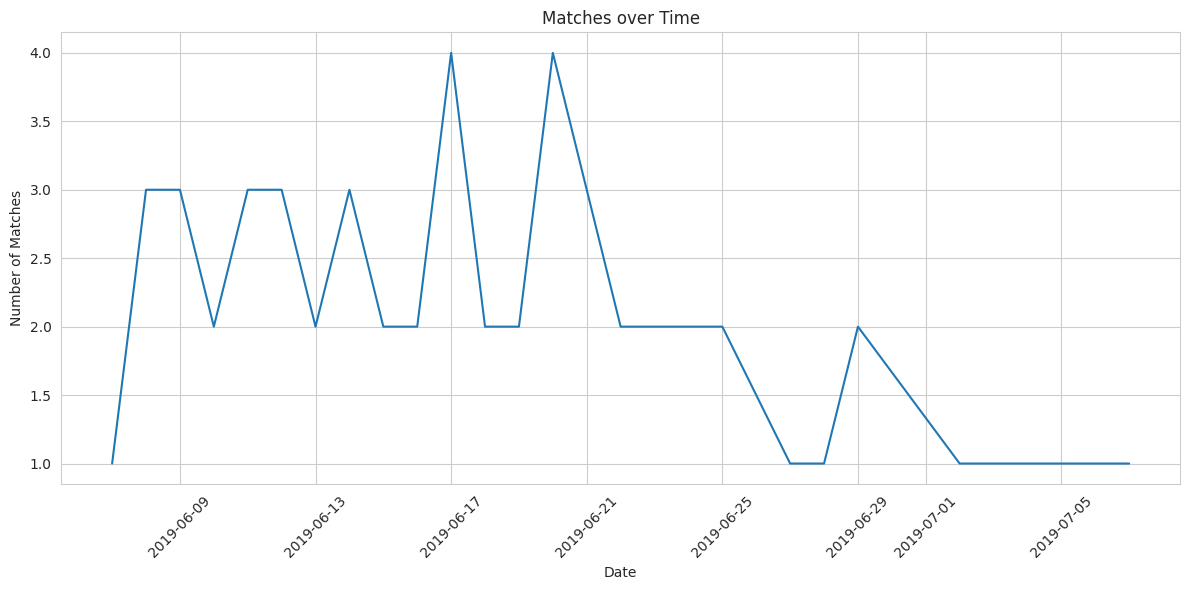

In [ ]:
matches['match_date'] = pd.to_datetime(matches['match_date'])
matches_per_date = matches.groupby('match_date').size()

plt.figure(figsize=(12, 6))
plt.plot(matches_per_date.index, matches_per_date.values)
plt.xlabel("Date")
plt.ylabel("Number of Matches")
plt.title("Matches over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Barplot** for visualizing the **goal difference** per team :

<ipython-input-25-cf6d2f9d3f1c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=goal_diff.index, y=goal_diff.values, palette="coolwarm") # Use a diverging palette for goal difference


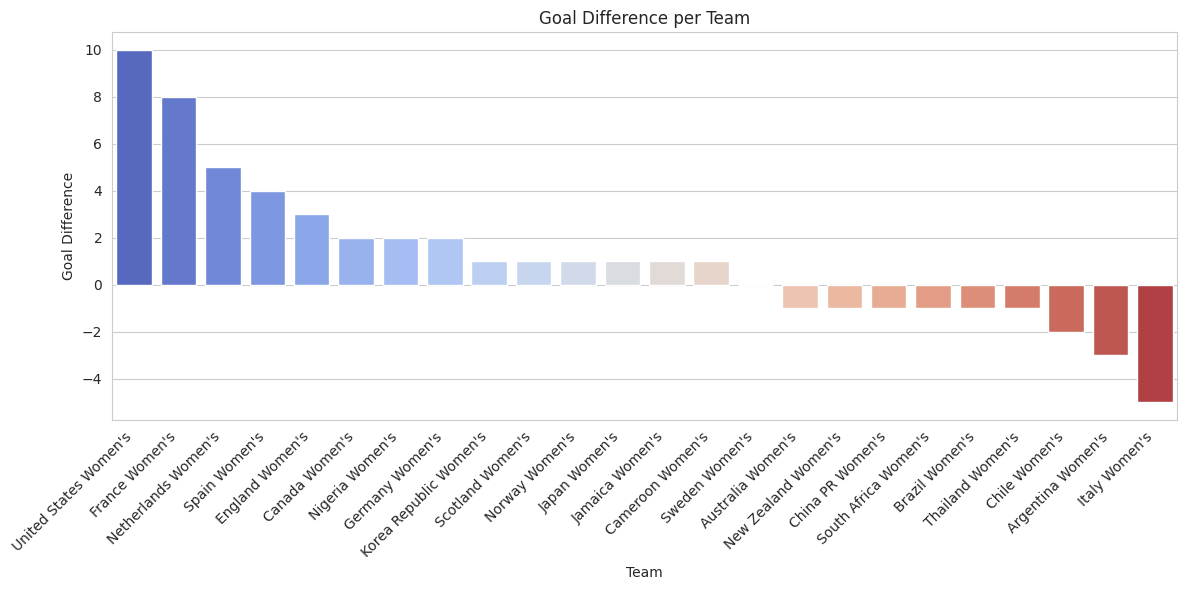

In [ ]:
goal_diff = matches.groupby('home_team')['home_score'].sum() - matches.groupby('away_team')['away_score'].sum()
goal_diff = goal_diff.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=goal_diff.index, y=goal_diff.values, palette="coolwarm") # Use a diverging palette for goal difference
plt.xlabel("Team")
plt.ylabel("Goal Difference")
plt.title("Goal Difference per Team")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#**Data Analysis and Data visualisition for the Women's World Cup 2019 Final Match**

In [ ]:
matches.iloc[27]

match_id                                             69321
match_date                             2019-07-07 00:00:00
kick_off                                      17:00:00.000
competition              International - Women's World Cup
season                                                2019
home_team                            United States Women's
away_team                              Netherlands Women's
home_score                                               2
away_score                                               0
match_status                                     available
match_status_360                                 scheduled
last_updated                    2023-07-24T21:54:11.999503
last_updated_360                   2021-06-13T16:17:31.694
match_week                                               7
competition_stage                                    Final
stadium                                   Groupama Stadium
referee                                 Stéphanie Frappart
home_managers                                Jillian Ellis
away_managers                     Sarina Glotzbach-Wiegman
data_version                                         1.1.0
shot_fidelity_version                                    2
xy_fidelity_version                                      2
Name: 27, dtype: object

#Data Aggregation of Events for Final Match between the United States and the Netherlands:
Aggregating all the event data and focusing on key events such as goals, passes, shots, and player actions.
This aggregation allows for a detailed analysis of the match and the performance of both teams during the final.


In [ ]:
events = sb.events(match_id=69321)
events

50_50 ball_receipt_outcome  \
0                                        NaN                  NaN   
1                                        NaN                  NaN   
2                                        NaN                  NaN   
3                                        NaN                  NaN   
4                                        NaN                  NaN   
...                                      ...                  ...   
3063                                     NaN                  NaN   
3064                                     NaN                  NaN   
3065  {'outcome': {'id': 1, 'name': 'Lost'}}                  NaN   
3066   {'outcome': {'id': 4, 'name': 'Won'}}                  NaN   
3067                                     NaN                  NaN   

     ball_recovery_recovery_failure carry_end_location clearance_aerial_won  \
0                               NaN                NaN                  NaN   
1                               NaN                NaN                  NaN   
2                               NaN                NaN                  NaN   
3                               NaN                NaN                  NaN   
4                               NaN                NaN                  NaN   
...                             ...                ...                  ...   
3063                            NaN                NaN                  NaN   
3064                            NaN                NaN                  NaN   
3065                            NaN                NaN                  NaN   
3066                            NaN                NaN                  NaN   
3067                            NaN                NaN                  NaN   

     clearance_body_part clearance_head clearance_left_foot  \
0                    NaN            NaN                 NaN   
1                    NaN            NaN                 NaN   
2                    NaN            NaN                 NaN   
3                    NaN            NaN                 NaN   
4                    NaN            NaN                 NaN   
...                  ...            ...                 ...   
3063                 NaN            NaN                 NaN   
3064                 NaN            NaN                 NaN   
3065                 NaN            NaN                 NaN   
3066                 NaN            NaN                 NaN   
3067                 NaN            NaN                 NaN   

     clearance_right_foot counterpress  ... substitution_outcome  \
0                     NaN          NaN  ...                  NaN   
1                     NaN          NaN  ...                  NaN   
2                     NaN          NaN  ...                  NaN   
3                     NaN          NaN  ...                  NaN   
4                     NaN          NaN  ...                  NaN   
...                   ...          ...  ...                  ...   
3063                  NaN          NaN  ...             Tactical   
3064                  NaN          NaN  ...             Tactical   
3065                  NaN          NaN  ...                  NaN   
3066                  NaN          NaN  ...                  NaN   
3067                  NaN          NaN  ...                  NaN   

     substitution_outcome_id  substitution_replacement  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   
...                      ...                       ...   
3063                   103.0  Christen Annemarie Press   
3064                   103.0        Carli Anne Hollins   
3065                     NaN                       NaN   
3066                     NaN                       NaN   
3067                     NaN                     

In [ ]:
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_outcome', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_end_location', 'pass_goal_assist',

In [ ]:
events.shot_statsbomb_xg.count()

21

In [ ]:
team1_name = "United States Women's"
team2_name = "Netherlands Women's"

In [ ]:
def get_team_events(events, team_name):
    events_team = events[
        ['team', 'minute', 'shot_body_part', 'shot_end_location', 'shot_statsbomb_xg', 'shot_technique', 'shot_type']
    ]
    events_team = events_team[events_team['team'] == team_name].reset_index(drop=True)
    events_team = events_team[events_team['shot_statsbomb_xg'].notna()]
    return events_team

In [ ]:
Events_team1 = get_team_events(events, team1_name)
Events_team2 = get_team_events(events, team2_name)

#Team 1 : The United States Women's
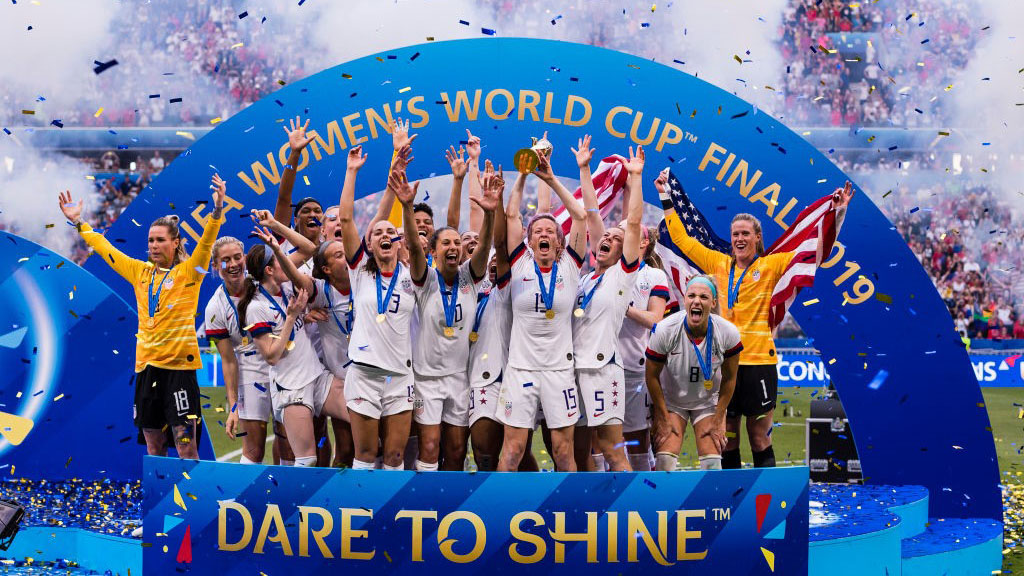

The xG metric is a key performance indicator that quantifies the quality of each shot based on various factors such as shot location, technique, and body part used.
This analysis helps us understand which shots had a higher likelihood of scoring, providing a deeper insight into the attacking performance of the teams.

In [ ]:
Events_team1

team  minute shot_body_part   shot_end_location  \
1580  United States Women's      26     Right Foot  [118.5, 40.9, 1.9]   
1581  United States Women's      37           Head  [115.7, 38.0, 1.1]   
1582  United States Women's      37      Left Foot  [118.7, 36.9, 0.2]   
1583  United States Women's      39      Left Foot  [117.3, 43.1, 0.2]   
1584  United States Women's      40      Left Foot       [109.0, 26.3]   
1585  United States Women's      45           Head  [120.0, 34.3, 1.6]   
1586  United States Women's      51     Right Foot  [120.0, 46.7, 2.5]   
1587  United States Women's      60     Right Foot  [120.0, 43.2, 0.2]   
1588  United States Women's      68      Left Foot  [120.0, 43.4, 0.2]   
1589  United States Women's      70      Left Foot       [110.5, 41.5]   
1590  United States Women's      75      Left Foot  [118.0, 37.2, 1.1]   
1591  United States Women's      75           Head  [120.0, 49.1, 7.1]   
1592  United States Women's      82      Left Foot  [117.3, 37.4, 1.4]   
1593  United States Women's      93      Left Foot       [108.3, 51.2]   
1594  United States Women's      94      Left Foot  [120.0, 33.8, 0.6]   

      shot_statsbomb_xg shot_technique  shot_type  
1580           0.074386         Volley  Open Play  
1581           0.079094         Normal  Open Play  
1582           0.096292         Normal  Open Play  
1583           0.050422         Normal  Open Play  
1584           0.028230         Normal  Open Play  
1585           0.142984         Normal  Open Play  
1586           0.016163         Normal  Open Play  
1587           0.783500         Normal    Penalty  
1588           0.142718         Normal  Open Play  
1589           0.156603         Normal  Open Play  
1590           0.296138         Normal  Open Play  
1591           0.068218         Normal  Open Play  
1592           0.138643         Normal  Open Play  
1593           0.076638         Normal  Open Play  
1594           0.021714    Half Volley  Open Play

**shotmap** with XG and shot technique

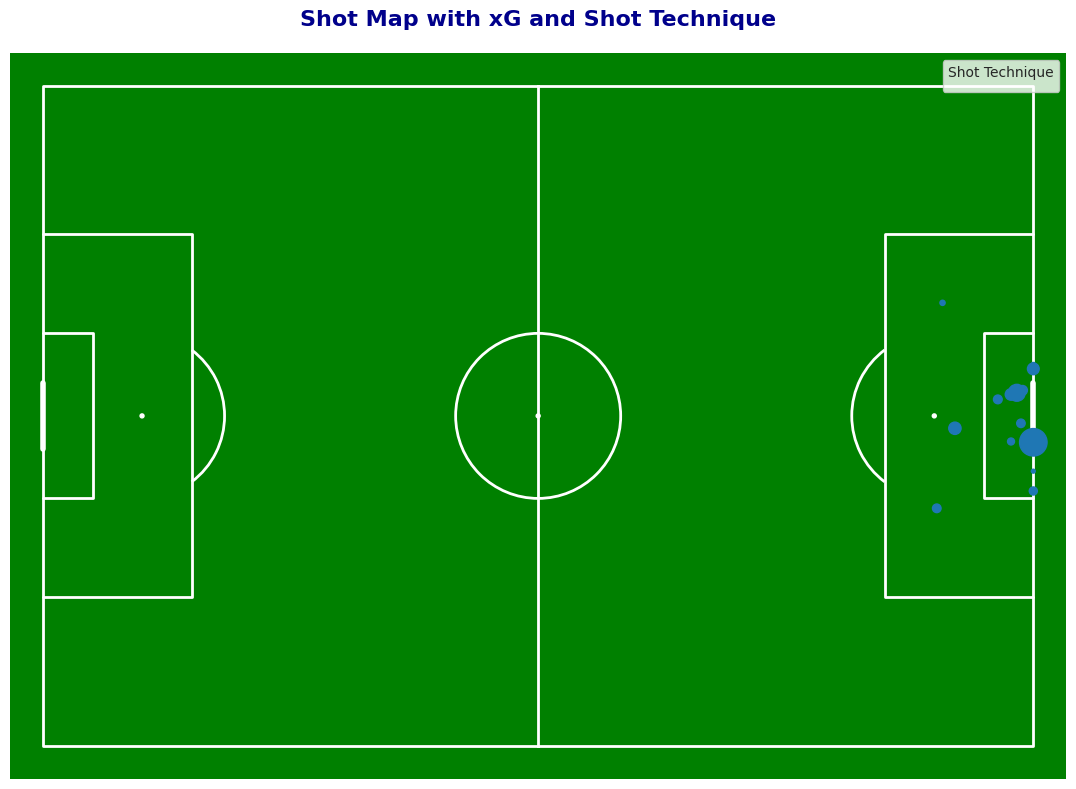

In [ ]:
# Extract shot locations (x, y) and shot stats
shot_x = [loc[0] for loc in Events_team1['shot_end_location']]
shot_y = [loc[1] for loc in Events_team1['shot_end_location']]
shot_xg = Events_team1['shot_statsbomb_xg']
shot_technique = Events_team1['shot_technique']

# Create football pitch
pitch = Pitch(pitch_color='green', line_color='white', stripe=False)
fig, ax = pitch.draw(figsize=(12, 8))

# Plot shot locations with sizes based on xG and colors based on shot technique
shot_colors = shot_technique.map({
    'Normal': 'dodgerblue',
    'Half Volley': 'red',
    'Free Kick': 'yellow',
    'Open Play': 'green'
})

# Scatter plot for shot locations
scatter = pitch.scatter(
    shot_x,
    shot_y,
    ax=ax,
    s=[xg * 500 for xg in shot_xg],  # Scale size by xG

)



# Title and labels
plt.title('Shot Map with xG and Shot Technique', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.legend(title="Shot Technique", loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


**Barplot** for visualizing **shot body part** distribution:

In [ ]:
shot_body_part_counts1 = Events_team1['shot_body_part'].value_counts()
shot_body_part_counts1

shot_body_part
Left Foot     9
Right Foot    3
Head          3
Name: count, dtype: int64

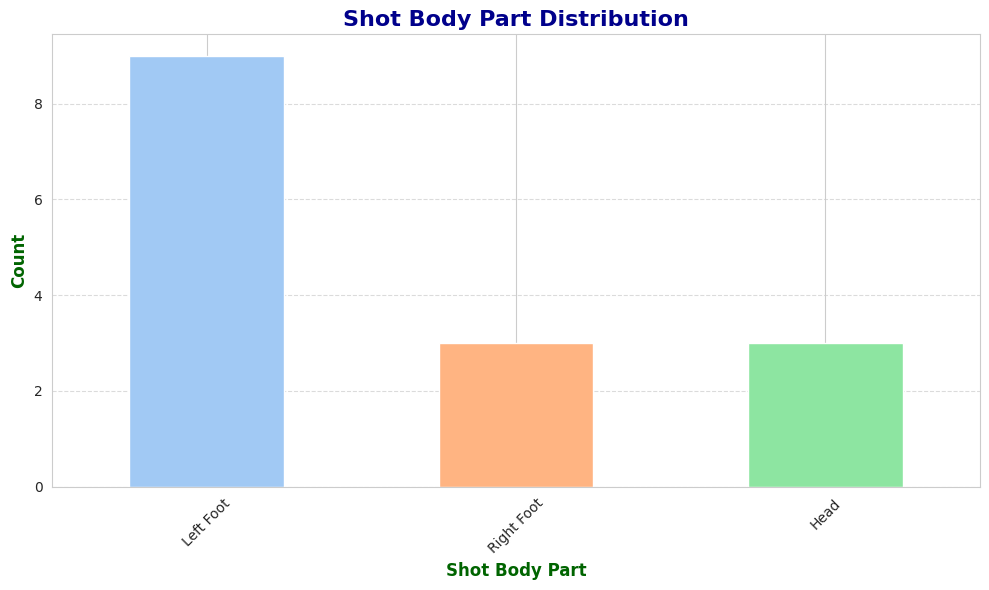

In [ ]:
plt.figure(figsize=(10, 6))
shot_body_part_counts1.plot(kind='bar', color=sns.color_palette("pastel", n_colors=len(shot_body_part_counts1)))
plt.title("Shot Body Part Distribution", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Shot Body Part", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Count", fontsize=12, fontweight='bold', color='darkgreen')
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


These lines of code filter the dataset to isolate **United States Women's** attacking actions, providing a clear view of their offensive performance.
By focusing on the **xG values**, we can evaluate the quality of each scoring opportunity, along with the specific minutes in which these chances occurred.


In [ ]:
xg_team1 = Events_team1 [['minute','shot_statsbomb_xg']]
xg_team1

minute  shot_statsbomb_xg
1580      26           0.074386
1581      37           0.079094
1582      37           0.096292
1583      39           0.050422
1584      40           0.028230
1585      45           0.142984
1586      51           0.016163
1587      60           0.783500
1588      68           0.142718
1589      70           0.156603
1590      75           0.296138
1591      75           0.068218
1592      82           0.138643
1593      93           0.076638
1594      94           0.021714

**xG of United States Women's Team Over Time**

**Lineplot** of the Expected Goals **XG** by the united states team during the final match :

In [ ]:
def plot_xg_by_minute(xg_team):
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=xg_team,
        x='minute',
        y='shot_statsbomb_xg',
        color='dodgerblue',
        linewidth=2
    )
    plt.title("Expected Goals (xG) by Minute", fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel("Minute", fontsize=12, fontweight='bold', color='darkgreen')
    plt.ylabel("Shot StatsBomb xG", fontsize=12, fontweight='bold', color='darkgreen')
    plt.xticks(ticks=range(0, 91, 5), fontsize=10)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

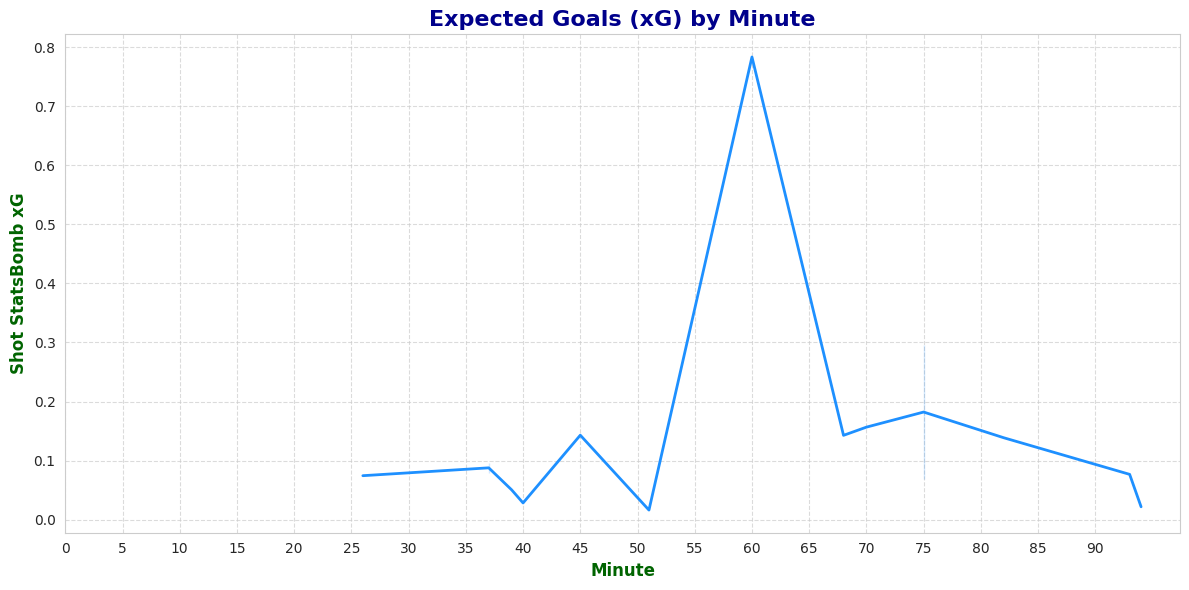

In [ ]:
plot_xg_by_minute(xg_team1)

This line plot highlights the moments when the team had significant scoring opportunities (high xG values) and when their offensive pressure increased or decreased. The xG is tracked at each minute, showing how the team's attacking efforts were spread across the match and helping to identify key moments that contributed to their overall offensive performance.

The plot provides valuable insights into the dynamics of the match, allowing us to analyze the flow of attacks and the quality of chances created by the United States Women's team during the 2019 Women's World Cup final.

#Team 2 :  The Netherlands Women's
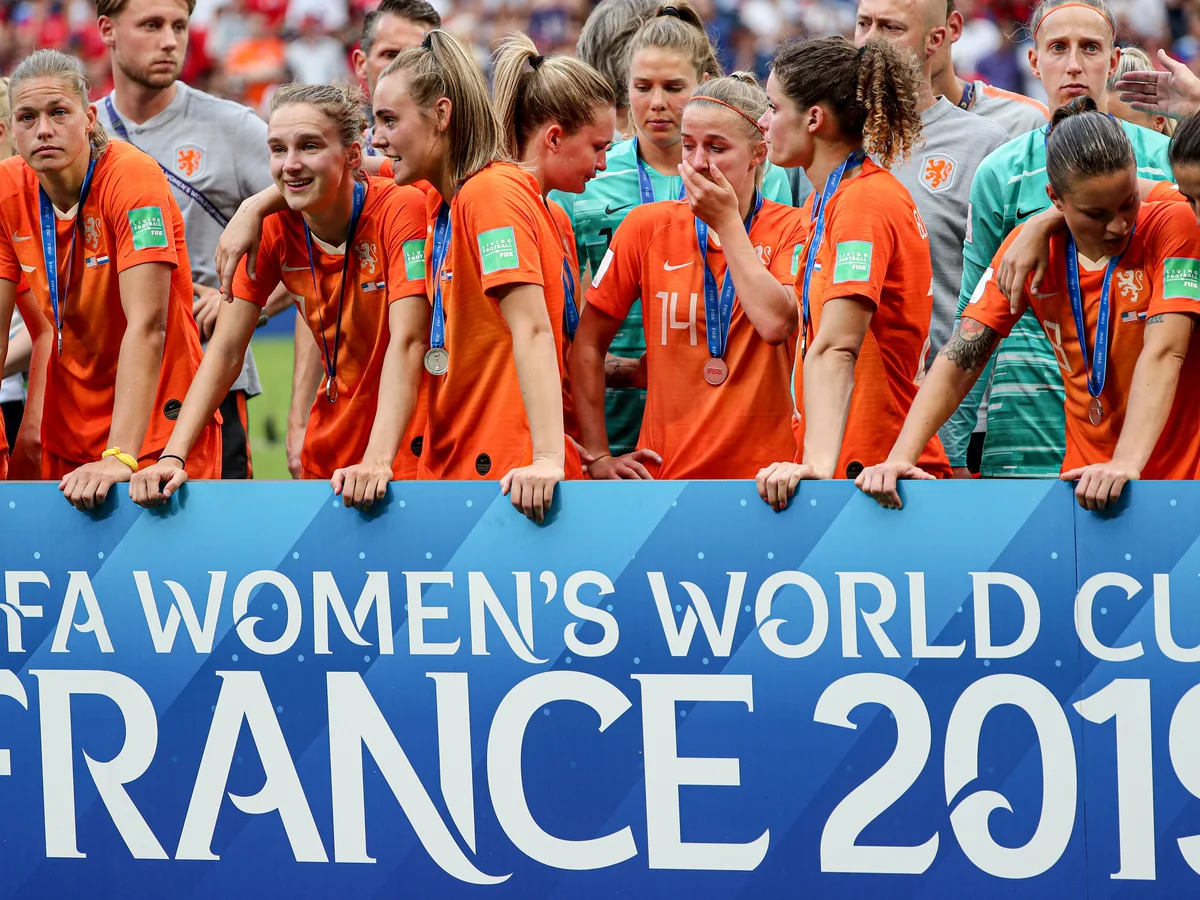

In [ ]:
Events_team2

team  minute shot_body_part   shot_end_location  \
1446  Netherlands Women's      42     Right Foot  [118.6, 43.2, 1.4]   
1447  Netherlands Women's      47     Right Foot        [94.1, 37.5]   
1448  Netherlands Women's      76     Right Foot  [118.5, 39.3, 1.1]   
1449  Netherlands Women's      79     Right Foot  [120.0, 35.3, 0.3]   
1450  Netherlands Women's      83     Right Foot        [96.2, 36.4]   
1451  Netherlands Women's      88      Left Foot  [120.0, 44.5, 0.1]   

      shot_statsbomb_xg shot_technique  shot_type  
1446           0.017424    Half Volley  Open Play  
1447           0.023916         Normal  Open Play  
1448           0.035140         Normal  Open Play  
1449           0.028694         Normal  Free Kick  
1450           0.024901         Normal  Open Play  
1451           0.060932         Normal  Open Play

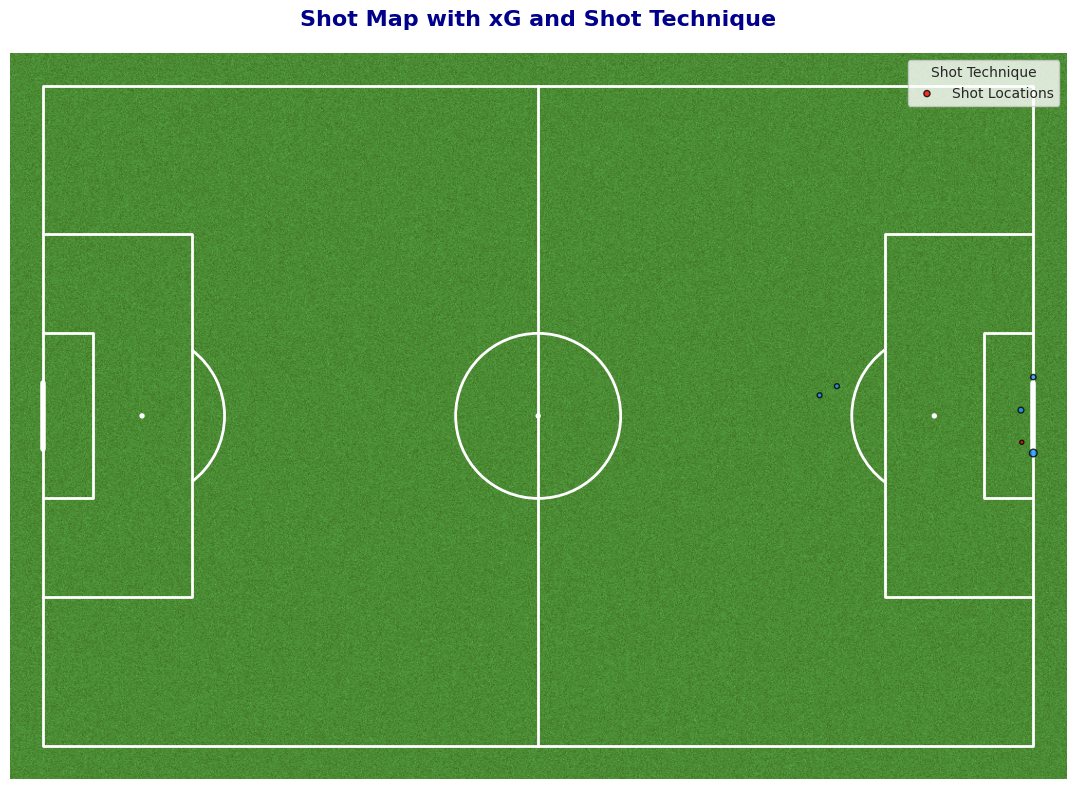

In [ ]:
# Extract shot locations (x, y) and shot stats
shot_x = [loc[0] for loc in Events_team2['shot_end_location']]
shot_y = [loc[1] for loc in Events_team2['shot_end_location']]
shot_xg = Events_team2['shot_statsbomb_xg']
shot_technique = Events_team2['shot_technique']

# Create football pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=False)
fig, ax = pitch.draw(figsize=(12, 8))

# Plot shot locations with sizes based on xG and colors based on shot technique
shot_colors = shot_technique.map({
    'Normal': 'dodgerblue',
    'Half Volley': 'red',
    'Free Kick': 'yellow',
    'Open Play': 'green'
})

# Scatter plot for shot locations
scatter = pitch.scatter(
    shot_x,
    shot_y,
    ax=ax,
    s=[xg * 500 for xg in shot_xg],  # Scale size by xG
    c=shot_colors,
    edgecolors='black',
    alpha=0.8,
    label='Shot Locations'
)


# Title and labels
plt.title('Shot Map with xG and Shot Technique', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.legend(title="Shot Technique", loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


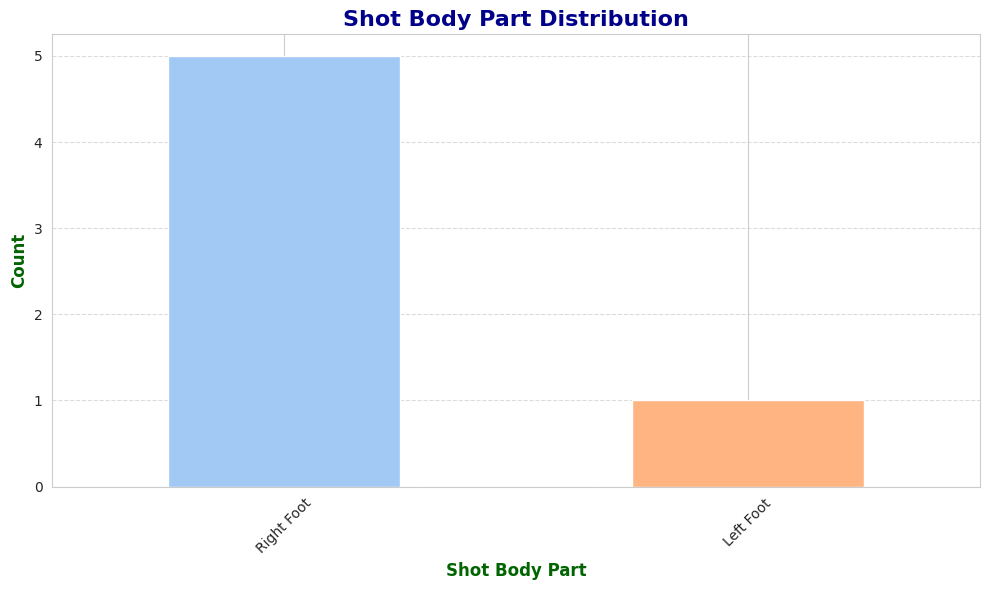

In [ ]:
shot_body_part_counts2 = Events_team2['shot_body_part'].value_counts()

plt.figure(figsize=(10, 6))
shot_body_part_counts2.plot(kind='bar', color=sns.color_palette("pastel", n_colors=len(shot_body_part_counts2)))
plt.title("Shot Body Part Distribution", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Shot Body Part", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Count", fontsize=12, fontweight='bold', color='darkgreen')
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
xg_team2 = Events_team2 [['minute','shot_statsbomb_xg']]
xg_team2

minute  shot_statsbomb_xg
1446      42           0.017424
1447      47           0.023916
1448      76           0.035140
1449      79           0.028694
1450      83           0.024901
1451      88           0.060932

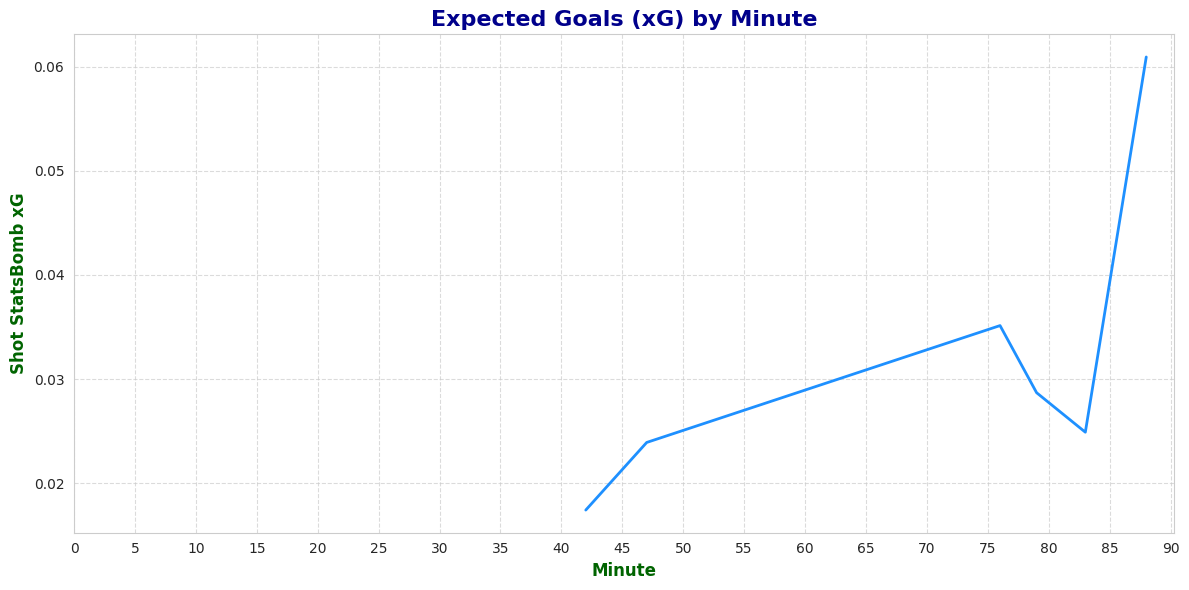

In [ ]:
plot_xg_by_minute(xg_team2)

#Comparison of xG by Time: United States Women's vs Netherlands Women's

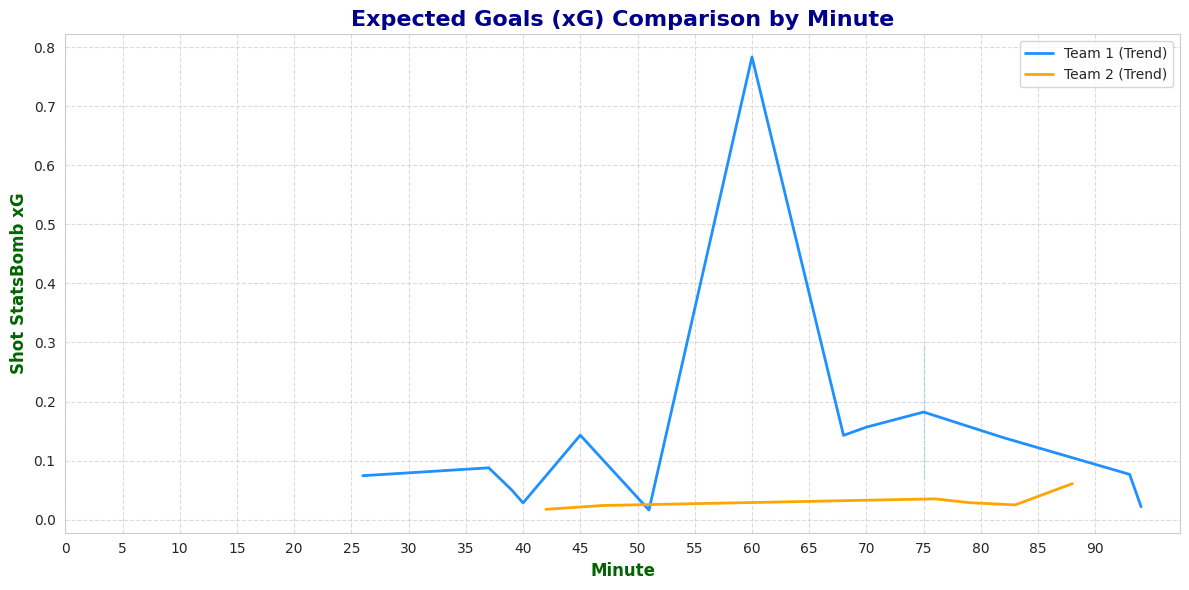

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=xg_team1,
    x='minute',
    y='shot_statsbomb_xg',
    color='dodgerblue',
    linewidth=2,
    label="Team 1 (Trend)"
)

sns.lineplot(
    data=xg_team2,
    x='minute',
    y='shot_statsbomb_xg',
    color='orange',
    linewidth=2,
    label="Team 2 (Trend)"
)

plt.title("Expected Goals (xG) Comparison by Minute", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Minute", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Shot StatsBomb xG", fontsize=12, fontweight='bold', color='darkgreen')
plt.xticks(ticks=range(0, 91, 5), fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

This line plot **compares the Expected Goals (xG) over time** for the United States Women's team and their opponent in the 2019 Women's World Cup final. The United States consistently outperforms the opponent, with a higher xG throughout the match, indicating more and better quality scoring chances. **This highlights their attacking dominance and superior performance in creating goal-scoring opportunities during the game.**

At the conclusion of my analysis, I turn to Expected Goals (xG), a crucial metric in modern football analytics. The xG value measures the probability of a shot turning into a goal based on several factors, including shot type, position, and game context. By analyzing xG data, I can assess whether the result of the match was consistent with the quality of the chances created by both teams, offering a more objective perspective on the final outcome.

#**Analyzing Lineups and Player Performance**

In [ ]:
sb.lineups(match_id=3901797)["United States Women's"]

player_id                    player_name  player_nickname  jersey_number  \
0        4940                  Andi Sullivan             None             17   
1        4999         Lindsey Michelle Horan    Lindsey Horan             10   
2        5003              Emily Ann Sonnett             None             14   
3        5021          Kelley Maureen O'Hara    Kelley O'Hara              5   
4        5025         Aubrey Renee Kingsbury             None             21   
5        5055           Lynn Raenie Williams             None              6   
6        5085      Alexandra Morgan Carrasco      Alex Morgan             13   
7        5088  Crystal Alyssia Dunn Soubrier     Crystal Dunn             19   
8        5100          Alyssa Michele Naeher    Alyssa Naeher              1   
9        5105                   Sofia Huerta             None              3   
10       6811                Julie Beth Ertz       Julie Ertz              8   
11       8298             Megan Anna Rapinoe    Megan Rapinoe             15   
12      24694                     Alana Cook             None             12   
13      30557                   Casey Murphy             None             18   
14      31936                  Kristie Mewis             None             22   
15      42256          Ashley Nicole Sanchez             None              2   
16      49172            Sophia Olivia Smith             None             11   
17     107491                  Emily Ann Fox             None             23   
18     107917      Trinity Rain Moyer-Rodman   Trinity Rodman             20   
19     218506          Savannah Marie DeMelo             None              9   
20     219423              Naomi Haile Girma             None              4   
21     389495          Alyssa Paola Thompson  Alyssa Thompson              7   

                     country  \
0   United States of America   
1   United States of America   
2   United States of America   
3   United States of America   
4   United States of America   
5   United States of America   
6   United States of America   
7   United States of America   
8   United States of America   
9   United States of America   
10  United States of America   
11  United States of America   
12  United States of America   
13  United States of America   
14  United States of America   
15  United States of America   
16  United States of America   
17  United States of America   
18  United States of America   
19  United States of America   
20  United States of America   
21  United States of America   

                                                cards  \
0                                                  []   
1                                                  []   
2                                                  []   
3                                                  []   
4                                                  []   
5                                                  []   
6                                                  []   
7                                                  []   
8                                                  []   
9                                                  []   
10  [{'time': '11:01', 'card_type': 'Yellow Card',...   
11                                                 []   
12                                                 []   
13                                                 []   
14                                                 []   
15                                                 []   
16                                                 []   
17                                                 []   
18                                                 []   
19                                                 []   
20                                                 []   
21                                                 []   

                                            positions  
0   [{'position_id': 11, 'position': 'Left Defensi...  
1 

#**My favourite player :**Alex Morgan
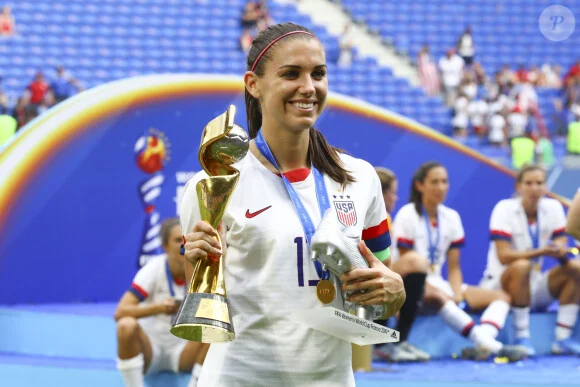

For this analysis, I chose to focus on Alex Morgan, my favorite football player, as she plays a pivotal role in the United States Women's National Team. By examining her events and data **during the Women's World Cup 2019**, I can highlight her individual contributions and performance, which greatly influenced the team's success.

In [ ]:
alex_morgan=5085

**Player events** on all the matches of the competition :

In [ ]:
def get_player_events(player_id, matches, sb):
    player_events = pd.DataFrame()
    for index, match in matches.iterrows():
        match_id = match['match_id']
        try:
            lineup = sb.lineups(match_id=match_id)
            if 'United States Women\'s' in lineup:
                if player_id in lineup['United States Women\'s']['player_id'].values:
                    events = sb.events(match_id=match_id)
                    player_events = pd.concat([player_events, events], ignore_index=True)
        except:
            pass  # some matches might not have lineup data
    return player_events


In [ ]:
alex_morgan_events=get_player_events(alex_morgan, matches, sb)
alex_morgan_events

50_50 ball_receipt_outcome  \
0                                                    NaN                  NaN   
1                                                    NaN                  NaN   
2                                                    NaN                  NaN   
3                                                    NaN                  NaN   
4                                                    NaN                  NaN   
...                                                  ...                  ...   
23047                                                NaN                  NaN   
23048                                                NaN                  NaN   
23049             {'outcome': {'id': 1, 'name': 'Lost'}}                  NaN   
23050  {'outcome': {'id': 3, 'name': 'Success To Team'}}                  NaN   
23051                                                NaN                  NaN   

      ball_recovery_recovery_failure block_deflection block_offensive  \
0                                NaN              NaN             NaN   
1                                NaN              NaN             NaN   
2                                NaN              NaN             NaN   
3                                NaN              NaN             NaN   
4                                NaN              NaN             NaN   
...                              ...              ...             ...   
23047                            NaN              NaN             NaN   
23048                            NaN              NaN             NaN   
23049                            NaN              NaN             NaN   
23050                            NaN              NaN             NaN   
23051                            NaN              NaN             NaN   

      carry_end_location clearance_aerial_won clearance_body_part  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                    NaN                  NaN                 NaN   
4                    NaN                  NaN                 NaN   
...                  ...                  ...                 ...   
23047                NaN                  NaN                 NaN   
23048                NaN                  NaN                 NaN   
23049                NaN                  NaN                 NaN   
23050                NaN                  NaN                 NaN   
23051                NaN                  NaN                 NaN   

      clearance_head clearance_left_foot  ... foul_committed_penalty  \
0                NaN                 NaN  ...                    NaN   
1                NaN                 NaN  ...                    NaN   
2                NaN                 NaN  ...                    NaN   
3                NaN                 NaN  ...                    NaN   
4                NaN                 NaN  ...                    NaN   
...              ...                 ...  ...                    ...   
23047            NaN                 NaN  ...                    NaN   
23048            NaN                 NaN  ...                    NaN   
23049            NaN                 NaN  ...                    NaN   
23050            NaN                 NaN  ...                    NaN   
23051            NaN                 NaN  ...                    NaN   

      foul_won_penalty miscontrol_aerial_won pass_miscommunication  \
0                  NaN                   NaN                   NaN   
1                  NaN                   NaN                   NaN   
2                  NaN                   NaN                   NaN   
3                  NaN                   NaN                   NaN   
4                  NaN                   NaN                   NaN   
...                ...                   ...                   ...   
23047            

Data aggregation and Data preprocessing :

In [ ]:
alex_morgan_events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot',
       ...
       'foul_committed_penalty', 'foul_won_penalty', 'miscontrol_aerial_won',
       'pass_miscommunication', 'pass_no_touch', 'injury_stoppage_in_chain',
       'clearance_other', 'goalkeeper_shot_saved_off_target',
       'shot_saved_off_target', 'pass_deflected'],
      dtype='object', length=105)

In [ ]:
alex_morgan_events['shot_statsbomb_xg'].dropna().unique()

array([0.08494443, 0.03111823, 0.19397984, 0.08419228, 0.23238441,
       0.03578947, 0.0547017 , 0.19891073, 0.01120019, 0.18330075,
       0.12682512, 0.04924497, 0.0435013 , 0.11536439, 0.13838702,
       0.15276843, 0.08424737, 0.054857  , 0.10201397, 0.4141377 ,
       0.09085521, 0.50886995, 0.2332145 , 0.08971482, 0.06249446,
       0.05785112, 0.07199693, 0.1810684 , 0.1521227 , 0.01181894,
       0.0314184 , 0.09475674, 0.00910953, 0.18937612, 0.0740359 ,
       0.15958321, 0.40454298, 0.8584217 , 0.10135481, 0.04808208,
       0.15121758, 0.6330302 , 0.02114254, 0.02069929, 0.05437393,
       0.04171547, 0.01624571, 0.04107942, 0.05014555, 0.12229547,
       0.08161572, 0.03402111, 0.03295969, 0.00943341, 0.0686085 ,
       0.03165816, 0.05036731, 0.04722862, 0.18059255, 0.13489367,
       0.12334641, 0.05529248, 0.5017711 , 0.07411344, 0.07121142,
       0.04486579, 0.16043931, 0.10180817, 0.05812313, 0.02373319,
       0.09036527, 0.05315531, 0.13030586, 0.07581884, 0.00633

In [ ]:
alex_morgan_events['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Duel', 'Clearance', 'Ball Recovery', 'Pressure', 'Miscontrol',
       'Dribbled Past', 'Dribble', 'Shot', 'Block', 'Goal Keeper',
       'Interception', 'Dispossessed', 'Offside', '50/50',
       'Foul Committed', 'Foul Won', 'Substitution', 'Half End',
       'Injury Stoppage', 'Tactical Shift', 'Own Goal For',
       'Own Goal Against', 'Error', 'Player Off', 'Player On', 'Shield',
       'Referee Ball-Drop'], dtype=object)

In [ ]:
def plot_player_shot_xg(player_events, player_name):
    player_shots = player_events[player_events['type'] == 'Shot']

    if not player_shots.empty:
        plt.figure(figsize=(10, 6))
        sns.histplot(player_shots['shot_statsbomb_xg'], kde=True)
        plt.title(f'Distribution of {player_name} Shot xG')
        plt.xlabel('Shot xG')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"No shots found for {player_name} in the data.")


The **histogram** highlights the shooting efficiency, while the KDE curve provides a smooth representation of the overall probability distribution of xG values. The KDE(**kernel density estimate**) works by placing a smooth, bell-shaped curve (kernel) over each data point and summing them to estimate the underlying distribution, making it easier to identify patterns in the data.

A **histogram with KDE** to visualize the **distribution** of **shot xG** values for a **specific player**

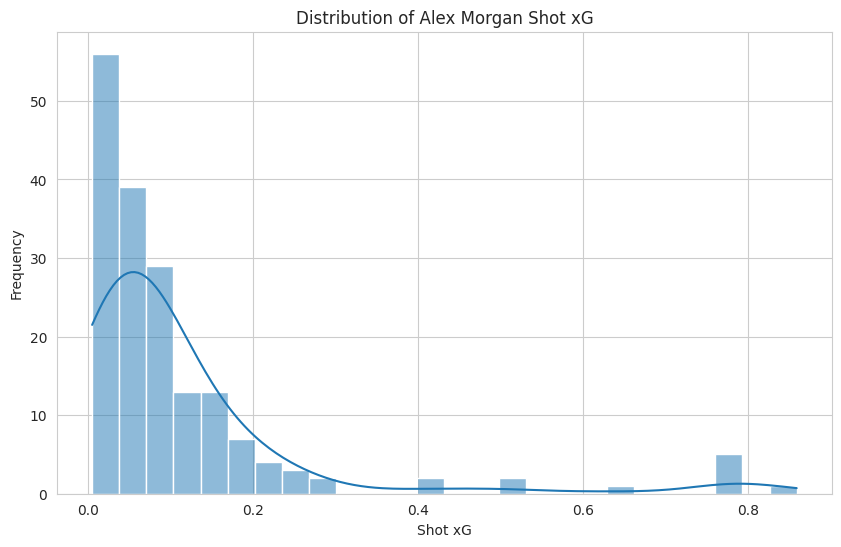

In [ ]:
plot_player_shot_xg(alex_morgan_events, "Alex Morgan")

# **Analyzing Individual Contribution in the Final Match:**
Focusing on the single contribution of a player within the United States team during the Women's World Cup 2019 final. This analysis highlights the player's impact on the team's performance, showcasing their actions such as passes, shots, and other key events that influenced the outcome of the match.

**1-Data Aggregation:**
Extracting all pass events from the player's dataset to create a dedicated DataFrame for analysis. This step is crucial for isolating passing actions and calculating key statistics such as completion percentage.

In [ ]:
def visualize_passes(events):
    # Calculate pass completion percentage
    passes = events[events['type'] == 'Pass']
    pass_completion_percentage = (passes['pass_outcome'].isnull().sum() / len(passes)) * 100

    # Create a pie chart for pass completion percentage
    plt.figure(figsize=(8, 8))
    plt.pie([pass_completion_percentage, 100 - pass_completion_percentage],
            labels=['Completed Passes', 'Incomplete Passes'],
            autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
    plt.title('Pass Completion Percentage')
    plt.show()

**2-Pie Chart of Pass Completion Percentage:**
Visualizing the pass completion percentage using a pie chart to provide a clear overview of the player's passing accuracy. The chart highlights the proportion of successful versus unsuccessful passes, making it easy to interpret the player's efficiency.

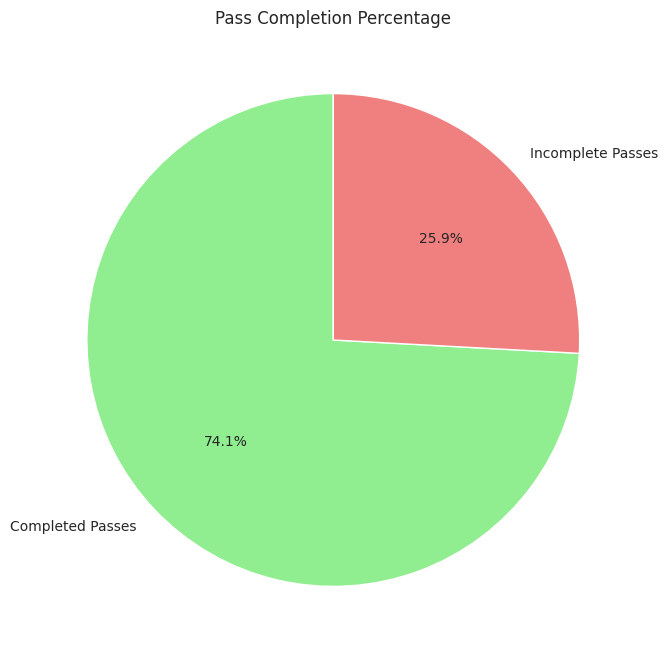

In [ ]:
visualize_passes(alex_morgan_events)

In [ ]:
 passes = events[events['type'] == 'Pass']
 passes

50_50 ball_receipt_outcome ball_recovery_recovery_failure  \
6     NaN                  NaN                            NaN   
7     NaN                  NaN                            NaN   
8     NaN                  NaN                            NaN   
9     NaN                  NaN                            NaN   
10    NaN                  NaN                            NaN   
..    ...                  ...                            ...   
840   NaN                  NaN                            NaN   
841   NaN                  NaN                            NaN   
842   NaN                  NaN                            NaN   
843   NaN                  NaN                            NaN   
844   NaN                  NaN                            NaN   

    carry_end_location clearance_aerial_won clearance_body_part  \
6                  NaN                  NaN                 NaN   
7                  NaN                  NaN                 NaN   
8                  NaN                  NaN                 NaN   
9                  NaN                  NaN                 NaN   
10                 NaN                  NaN                 NaN   
..                 ...                  ...                 ...   
840                NaN                  NaN                 NaN   
841                NaN                  NaN                 NaN   
842                NaN                  NaN                 NaN   
843                NaN                  NaN                 NaN   
844                NaN                  NaN                 NaN   

    clearance_head clearance_left_foot clearance_right_foot counterpress  ...  \
6              NaN                 NaN                  NaN          NaN  ...   
7              NaN                 NaN                  NaN          NaN  ...   
8              NaN                 NaN                  NaN          NaN  ...   
9              NaN                 NaN                  NaN          NaN  ...   
10             NaN                 NaN                  NaN          NaN  ...   
..             ...                 ...                  ...          ...  ...   
840            NaN                 NaN                  NaN          NaN  ...   
841            NaN                 NaN                  NaN          NaN  ...   
842            NaN                 NaN                  NaN          NaN  ...   
843            NaN                 NaN                  NaN          NaN  ...   
844            NaN                 NaN                  NaN          NaN  ...   

    substitution_outcome substitution_outcome_id substitution_replacement  \
6                    NaN                     NaN                      NaN   
7                    NaN                     NaN                      NaN   
8                    NaN                     NaN                      NaN   
9                    NaN                     NaN                      NaN   
10                   NaN                     NaN                      NaN   
..                   ...                     ...                      ...   
840                  NaN                     NaN                      NaN   
841                  NaN                     NaN                      NaN   
842                  NaN                     NaN                      NaN   
843                  NaN                     NaN                      NaN   
844                  NaN                     NaN                      NaN   

     substitution_replacement_id tactics                   team team_id  \
6                            NaN     NaN  United States Women's    1214   
7                            NaN     NaN  United States Women's    1214   
8                            NaN     NaN  United States Women's    1214   
9                            NaN     NaN    Netherlands Women's     851   
10                           NaN     NaN  United States Women's    1214   
..                           ...     ...                    ...     ..

In [ ]:
passes.columns.unique()

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_outcome', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_end_location', 'pass_goal_assist',

For this analysis too, I chose to focus on Alex Morgan, my favorite football player, as she plays a pivotal role in the United States Women's National Team.

In [ ]:
alex_morgan_events.shape

(23052, 105)

In [ ]:
alex_morgan_events.isna().sum()


50_50                               23042
ball_receipt_outcome                21953
ball_recovery_recovery_failure      22993
block_deflection                    23047
block_offensive                     23047
                                    ...  
injury_stoppage_in_chain            23046
clearance_other                     23049
goalkeeper_shot_saved_off_target    23050
shot_saved_off_target               23050
pass_deflected                      23050
Length: 105, dtype: int64

In [ ]:
def visualize_player_passes(events, player_name):
    # Filter for pass events from the specific player
    player_passes = events[(events['type'] == 'Pass') & (events['player'] == player_name)]

    if player_passes.empty:
        print(f"No passes found for {player_name}")
        return

    # Calculate pass completion percentage
    pass_completion_percentage = (player_passes['pass_outcome'].isnull().sum() / len(player_passes)) * 100

    # Create a pie chart for pass completion percentage
    plt.figure(figsize=(8, 8))
    plt.pie([pass_completion_percentage, 100 - pass_completion_percentage],
            labels=['Completed Passes', 'Incomplete Passes'],
            autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
    plt.title(f'Pass Completion Percentage of {player_name}')
    plt.axis('equal')
    plt.show()

    # Initialize pitch
    pitch = Pitch(line_color='white', pitch_color='green')
    fig, ax = pitch.draw(figsize=(10, 7))

    # Loop through each pass and draw the pass lines between start and end locations
    for _, pass_event in player_passes.iterrows():
        start_x, start_y = pass_event['location'][:2]  # Extract start location (x, y)
        end_x, end_y = pass_event['pass_end_location'][:2]  # Extract end location (x, y)

        # Plot the pass line
        pass_outcome = pass_event['pass_outcome'] if pd.notna(pass_event['pass_outcome']) else 'Successful'
        pass_color = 'green' if pass_outcome == 'Successful' else 'red'  # Green for successful, red for incomplete
        ax.plot([start_x, end_x], [start_y, end_y], color=pass_color, alpha=0.6, lw=2)

    # Optionally, add some text annotations for player names at start and end locations
    for _, pass_event in player_passes.iterrows():
        start_x, start_y = pass_event['location'][:2]
        end_x, end_y = pass_event['pass_end_location'][:2]

        # Add player labels for pass origin and destination
        ax.text(start_x, start_y, pass_event['player'], fontsize=8, ha='center', color='blue')
        ax.text(end_x, end_y, pass_event['pass_recipient'], fontsize=8, ha='center', color='red')

    plt.title(f"{player_name}'s Pass Network on the Pitch")
    plt.show()


#United states players performance:

In [ ]:
visualize_player_passes(events, player_name="Alex Morgan")

No passes found for Alex Morgan


**3-Pass Visualization on the Pitch:**
Displaying the player's passes on a football pitch to show their distribution and direction. This plot helps analyze passing patterns, preferred zones, and field coverage, offering insights into the player's role and involvement during matches.

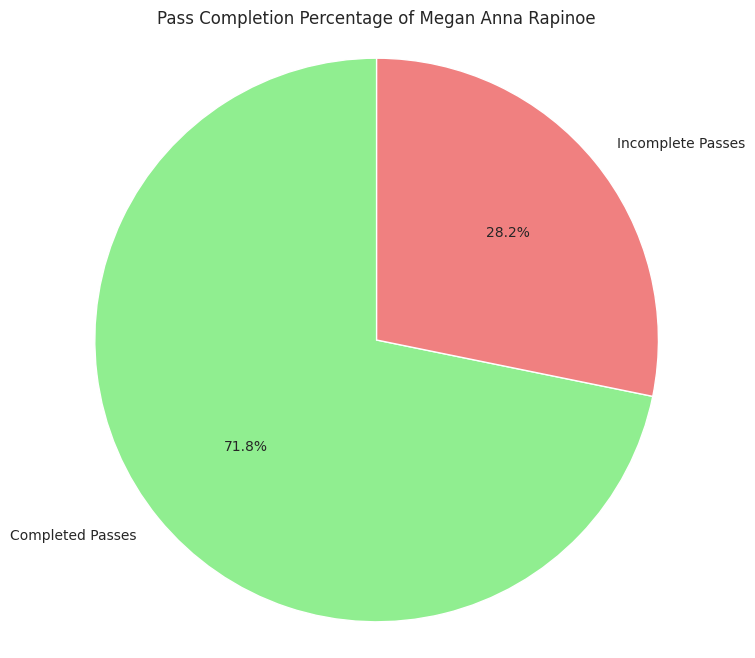

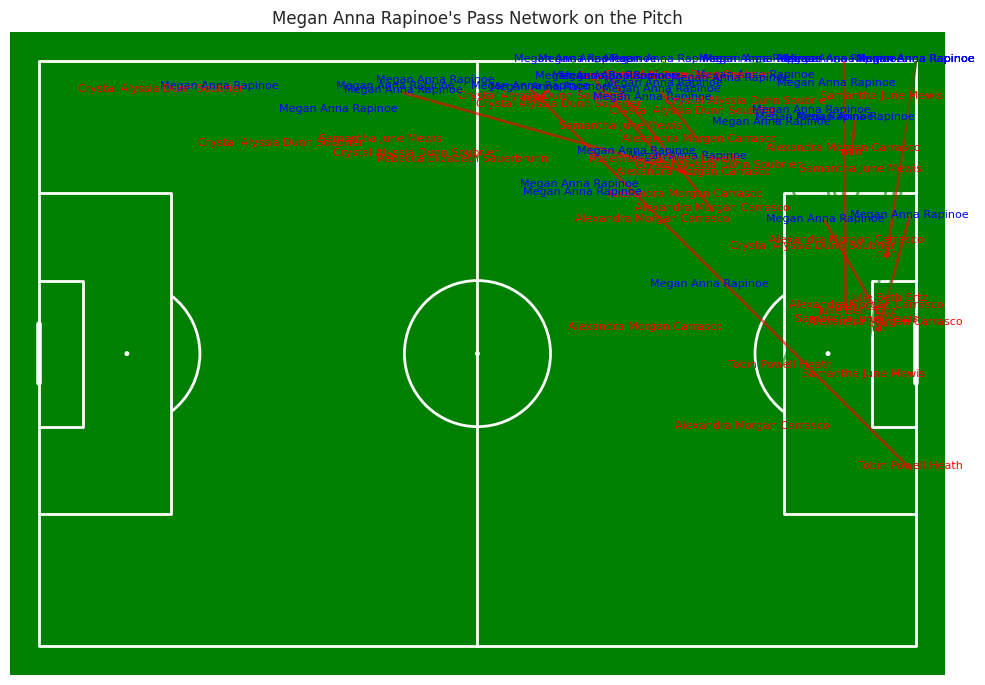

In [ ]:
visualize_player_passes(events, player_name="Megan Anna Rapinoe")


Since Alex Morgan did not participate in the final match of the 2019 Women's World Cup, I have chosen **Megan Anna Rapinoe** and **Crystal Alyssia Dunn Soubrier** from the U**nited States lineup** to analyze their contributions. By focusing on these players, I aim to showcase their individual performances and the impact they had on the final match.

In [ ]:
sb.lineups(match_id=3901797)["United States Women's"]

player_id                    player_name  player_nickname  jersey_number  \
0        4940                  Andi Sullivan             None             17   
1        4999         Lindsey Michelle Horan    Lindsey Horan             10   
2        5003              Emily Ann Sonnett             None             14   
3        5021          Kelley Maureen O'Hara    Kelley O'Hara              5   
4        5025         Aubrey Renee Kingsbury             None             21   
5        5055           Lynn Raenie Williams             None              6   
6        5085      Alexandra Morgan Carrasco      Alex Morgan             13   
7        5088  Crystal Alyssia Dunn Soubrier     Crystal Dunn             19   
8        5100          Alyssa Michele Naeher    Alyssa Naeher              1   
9        5105                   Sofia Huerta             None              3   
10       6811                Julie Beth Ertz       Julie Ertz              8   
11       8298             Megan Anna Rapinoe    Megan Rapinoe             15   
12      24694                     Alana Cook             None             12   
13      30557                   Casey Murphy             None             18   
14      31936                  Kristie Mewis             None             22   
15      42256          Ashley Nicole Sanchez             None              2   
16      49172            Sophia Olivia Smith             None             11   
17     107491                  Emily Ann Fox             None             23   
18     107917      Trinity Rain Moyer-Rodman   Trinity Rodman             20   
19     218506          Savannah Marie DeMelo             None              9   
20     219423              Naomi Haile Girma             None              4   
21     389495          Alyssa Paola Thompson  Alyssa Thompson              7   

                     country  \
0   United States of America   
1   United States of America   
2   United States of America   
3   United States of America   
4   United States of America   
5   United States of America   
6   United States of America   
7   United States of America   
8   United States of America   
9   United States of America   
10  United States of America   
11  United States of America   
12  United States of America   
13  United States of America   
14  United States of America   
15  United States of America   
16  United States of America   
17  United States of America   
18  United States of America   
19  United States of America   
20  United States of America   
21  United States of America   

                                                cards  \
0                                                  []   
1                                                  []   
2                                                  []   
3                                                  []   
4                                                  []   
5                                                  []   
6                                                  []   
7                                                  []   
8                                                  []   
9                                                  []   
10  [{'time': '11:01', 'card_type': 'Yellow Card',...   
11                                                 []   
12                                                 []   
13                                                 []   
14                                                 []   
15                                                 []   
16                                                 []   
17                                                 []   
18                                                 []   
19                                                 []   
20                                                 []   
21                                                 []   

                                            positions  
0   [{'position_id': 11, 'position': 'Left Defensi...  
1 

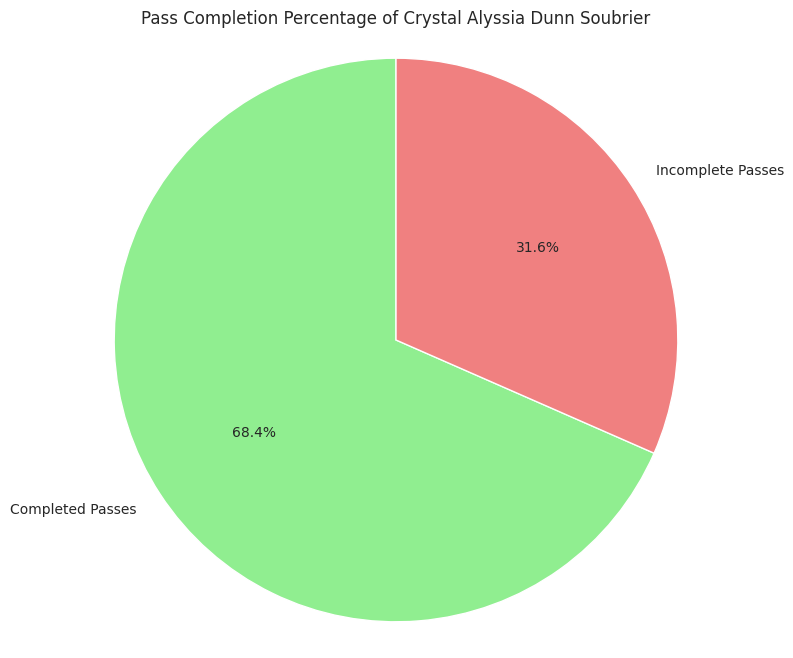

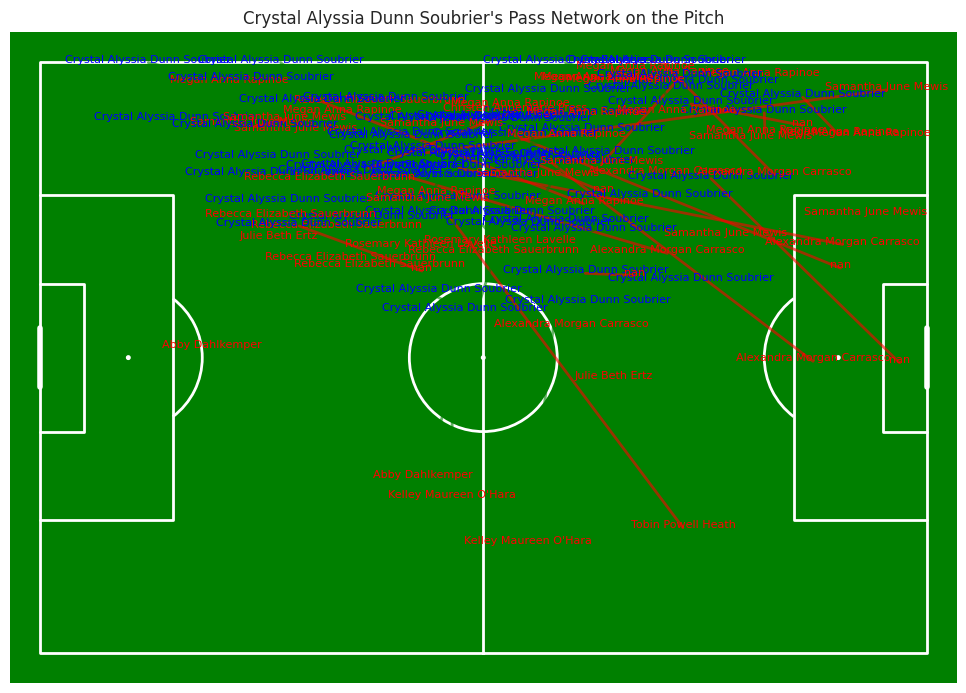

In [ ]:
visualize_player_passes(events, player_name="Crystal Alyssia Dunn Soubrier")

#Netherlands players performance:

In addition to the United States players, I also selected players from the Netherlands team to analyze their contributions during the final match. This allowed me to compare key moments from both teams and highlight the performance of individual players.

In [ ]:
sb.lineups(match_id=69321)["Netherlands Women's"]

player_id                             player_name        player_nickname  \
0       10645                          Sherida Spitse                   None   
1       10646                     Sari van Veenendaal                   None   
2       10647                 Stephanie van der Gragt                   None   
3       10648                   Shanice van de Sanden  Shanice van de Sanden   
4       10649                           Lieke Martens                   None   
5       10650                              Jill Roord                   None   
6       10651                             Kika van Es                   None   
7       10652                            Anouk Dekker                   None   
8       10654                          Jackie Groenen                   None   
9       10656                      Lineth Beerensteyn                   None   
10      10657                    Desiree van Lunteren                   None   
11      10658                    Danielle van de Donk                   None   
12      10661                           Renate Jansen                   None   
13      10662                       Liza van der Most                   None   
14      10666  Dominique Johanna Anna Petrone Janssen   Dominique Bloodworth   
15      13745                             Loes Geurts                   None   
16      15579                          Inessa Kaagman                   None   
17      15623                        Vivianne Miedema                   None   
18      16383                        Danique Kerkdijk                   None   
19      25659                        Merel van Dongen                   None   
20      50816                            Ellen Jansen                   None   
21      63784                                Lize Kop                   None   
22      63788                         Victoria Pelova                   None   

    jersey_number      country  \
0               8  Netherlands   
1               1  Netherlands   
2               3  Netherlands   
3               7  Netherlands   
4              11  Netherlands   
5              19  Netherlands   
6               5  Netherlands   
7               6  Netherlands   
8              14  Netherlands   
9              21  Netherlands   
10              2  Netherlands   
11             10  Netherlands   
12             13  Netherlands   
13             22  Netherlands   
14             20  Netherlands   
15             23  Netherlands   
16             15  Netherlands   
17              9  Netherlands   
18             18  Netherlands   
19              4  Netherlands   
20             17  Netherlands   
21             16  Netherlands   
22             12  Netherlands   

                                                cards  \
0   [{'time': '09:27', 'card_type': 'Yellow Card',...   
1                                                  []   
2   [{'time': '57:54', 'card_type': 'Yellow Card',...   
3                                                  []   
4                                                  []   
5                                                  []   
6                                                  []   
7                                                  []   
8                                                  []   
9                                                  []   
10                                                 []   
11                                                 []   
12                                                 []   
13                                                 []   
14                                                 []   
15                                                 []   
16                                                 []   
17                                                 []   
18                                                 []   
19                                                 []   
20                                                 []   
21          

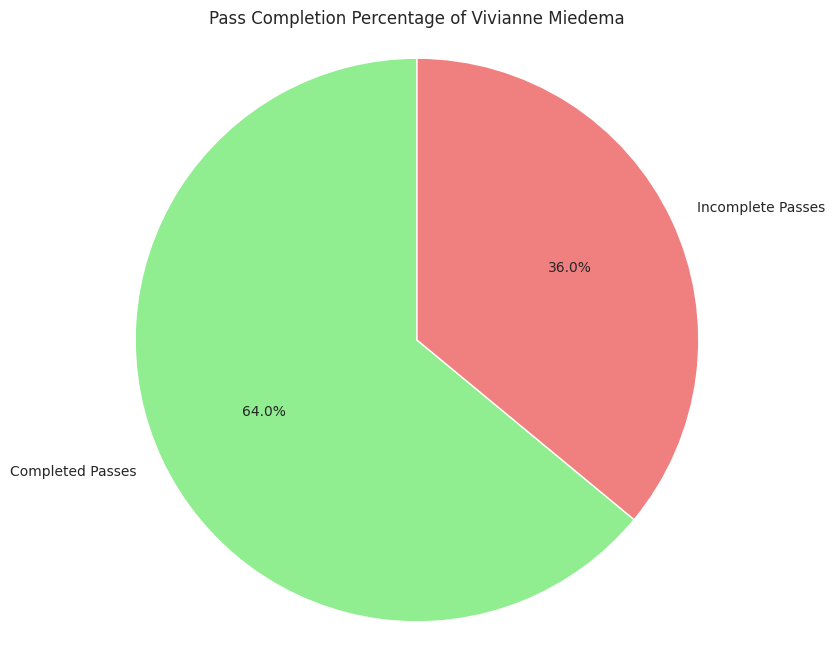

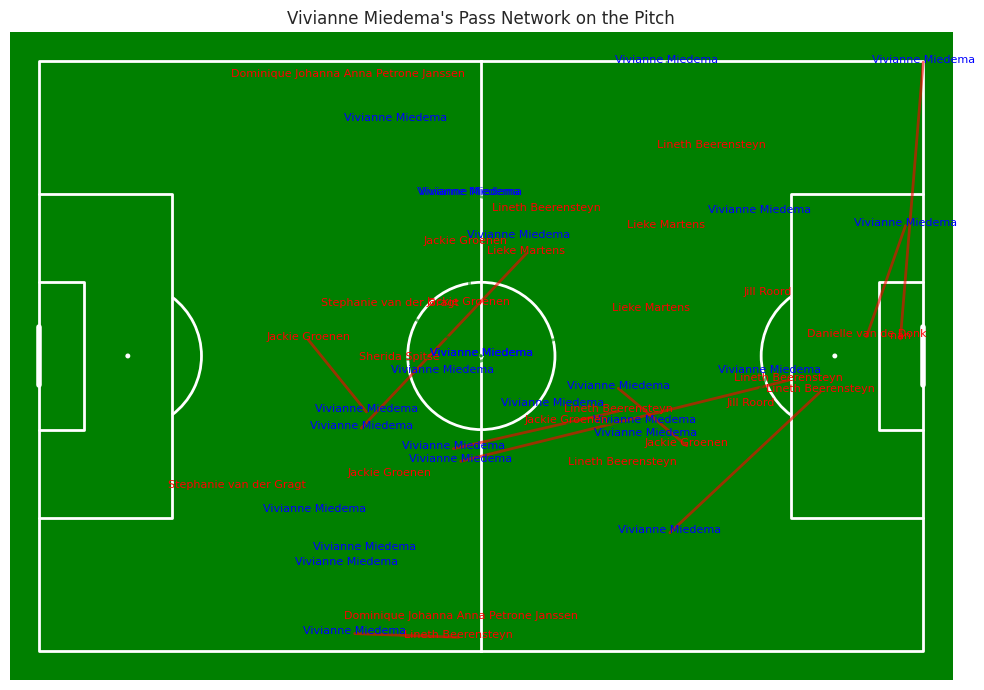

In [ ]:
visualize_player_passes(events, player_name="Vivianne Miedema")

In [ ]:
visualize_player_passes(events, player_name="Inessa Kaagman")

No passes found for Inessa Kaagman


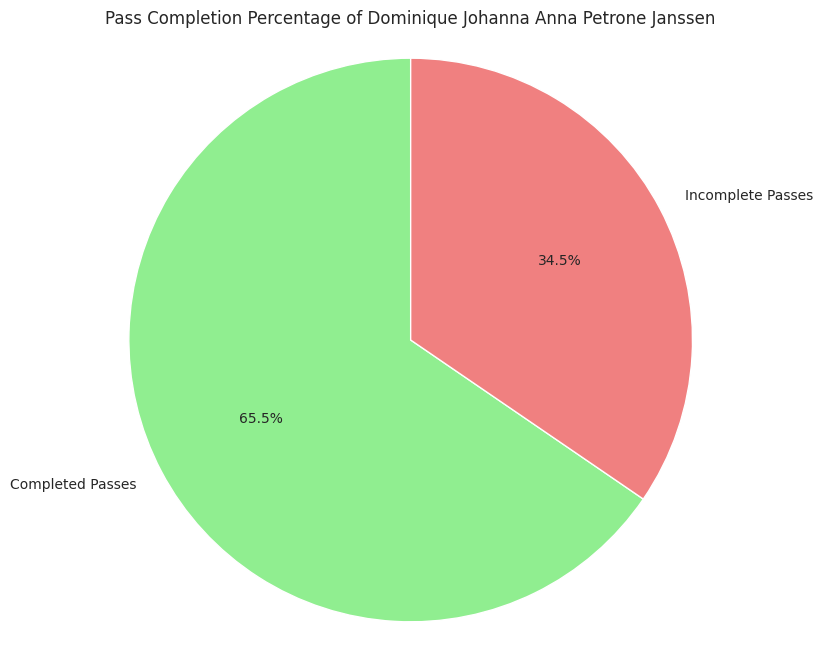

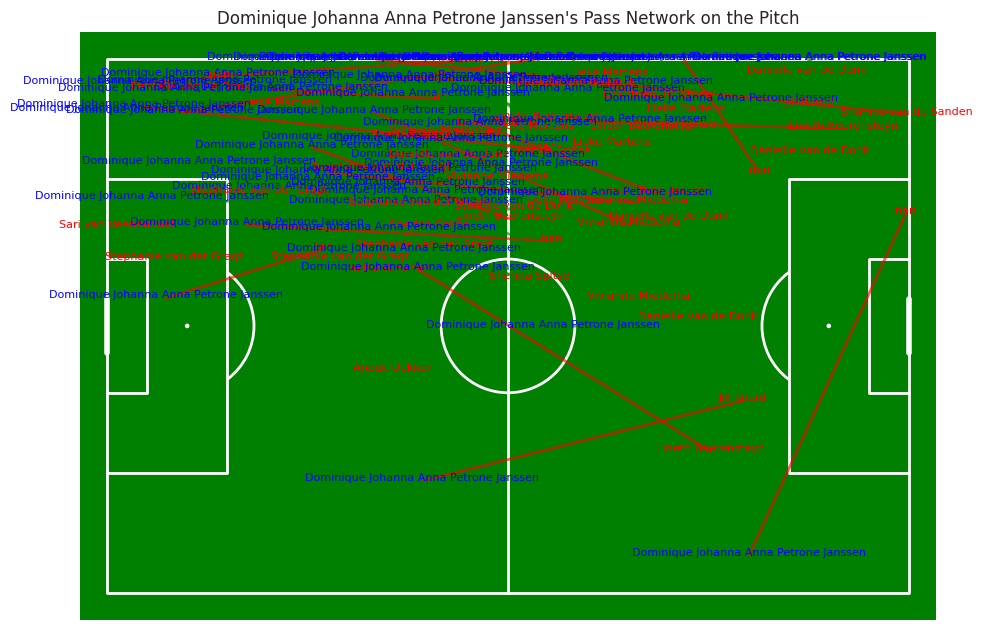

In [ ]:
visualize_player_passes(events, player_name="Dominique Johanna Anna Petrone Janssen")

###**Tactical conclusion :**

The visualizations revealed a clear difference in the teams' performances, particularly in their distribution on the pitch. The United States players were well-organized, with efficient passing and positioning, while the Netherlands players seemed disorganized. This lack of structure contributed to their struggle in controlling the match, which ultimately led to their loss.

# **General Conclusion of Work:**
The analysis began with a comprehensive **competition-level analysis**, where I visualized the overall performance of teams participating in key competitions like the **2019 FIFA Women's World Cup**. This included visualizations of the teams' overall statistics, including expected goals (xG) during matches, to provide insights into their offensive and defensive strategies. By comparing teams, I could identify patterns in their playstyles and evaluate their strengths and weaknesses, setting the stage for a deeper dive into individual matches.

Following the competition analysis, I focused on **match-level analysis**, where I explored the dynamics of specific games, including a detailed comparison between teams like the United States and the Netherlands. This allowed me to visualize how different teams performed in key moments of the match and to identify the causes behind their victories or losses, such as struggles with pass accuracy and shot conversion or organizational issues.

The final stage of the analysis centered on **individual player performance**. With the functions developed during this work, I was able to visualize and analyze the contributions of players in any team lineup, including their passes and pass success rate. I also visualized these actions on the pitch, allowing for a clear understanding of how players influenced their team’s performance. Tools like pass completion pie charts and pass networks provided insights into individual playmaking ability and style.

With the functions developed in this analysis, I can now analyze and visualize data from any competition, match, or player, offering flexibility for tactical and performance analysis across a wide range of football data.